# 1. UNSUPERVISED LEARNING

Unsupervised learning dataset source link: https://archive.ics.uci.edu/dataset/292/wholesale+customers

In [2]:
# Import necessary datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the wholesale customers dataset
df = pd.read_csv(r'D:\BSc\3rd year\Machine Learning\Coursework\Wholesale customers data.csv')

In [4]:
# View the data
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [5]:
# Check summary statistics
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [6]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# Check the size of the dataset
df.shape

(440, 8)

# Cleaning the dataset

In [8]:
# Check for duplicate entries
df[df.duplicated()]

Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []

There are no duplicate rows

In [9]:
# Find the % of null values in each column
df.isnull().sum()*100/df.shape[0]

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

There are no null values in the dataset

## Outlier removal

In [10]:
# Interquartile range method is used

# Create a function to remove outliers

def outlier(df):  
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    df_cleaned = df[~((df < lb) | (df > ub)).any(axis=1)]
    return df_cleaned

In [11]:
# Remove outliers using the function
df_cleaned = outlier(df.copy())

In [12]:
# See if any outliers were removed
df_cleaned.shape

(332, 8)

Outliers were present and were removed

# Exploratory data analysis

### Plot the distributions of each continuous variable using histograms

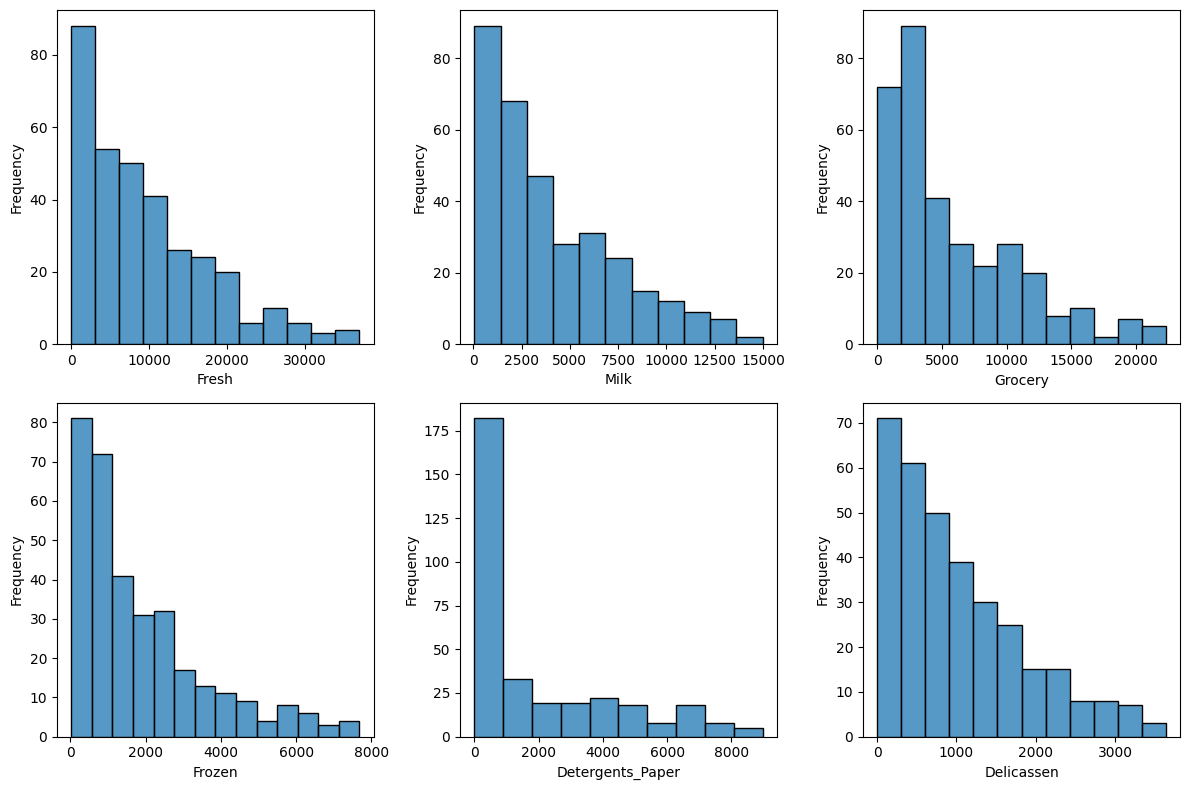

In [13]:
# Create a figure for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12,8))

axes= [ax for axes_row in axes for ax in axes_row]

# Get the continuous features
cont_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Plot histograms for each continuous variable
for i, feature in enumerate(cont_features):
    sns.histplot(df_cleaned[feature] ,ax = axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

All the distributions are skewed to the right so we need to standardise them before modelling

In [14]:
# Check unique values in Channel column
df_cleaned['Channel'].value_counts()

Channel
1    237
2     95
Name: count, dtype: int64

In [15]:
# Replace values in Channel column for better understanding
df_cleaned['Channel'] = df_cleaned['Channel'].replace([1,2], ['Horeca', 'Retail']) # Horeca = Hotel/Restaurant/Cafe

Text(0.5, 1.0, 'Channel count')

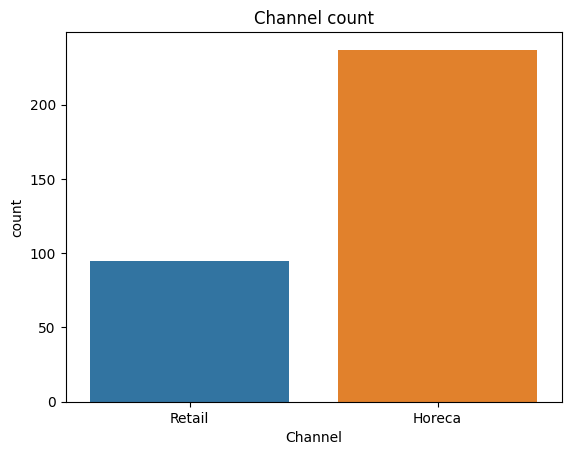

In [16]:
# Plot a bar graph to see the channel count

sns.countplot(x = 'Channel', data = df_cleaned, hue = 'Channel')
plt.title('Channel count')

In [17]:
# Check unique values in Channel column
df_cleaned['Region'].value_counts()

Region
3    239
1     60
2     33
Name: count, dtype: int64

In [18]:
# Replace values in Region column for better understanding
df_cleaned['Region'] = df_cleaned['Region'].replace([1,2,3], ['Lisbon', 'Porto', 'Other'])

Text(0.5, 1.0, 'Region count')

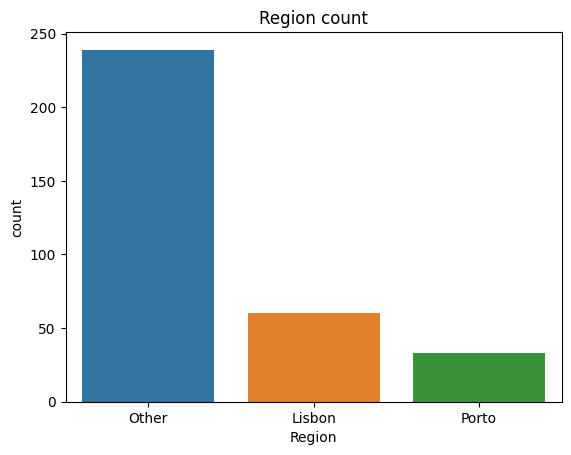

In [19]:
# Plot a bar graph to see the region count

sns.countplot(x = 'Region', data = df_cleaned, hue = 'Region')
plt.title('Region count')

Text(0.5, 1.0, 'Channel count by region')

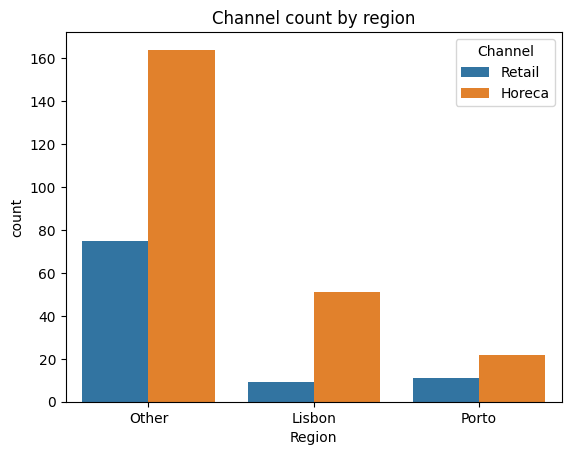

In [20]:
# Plot a bar graph to see channel count by region

sns.countplot(x = 'Region', data = df_cleaned, hue = 'Channel')
plt.title('Channel count by region')

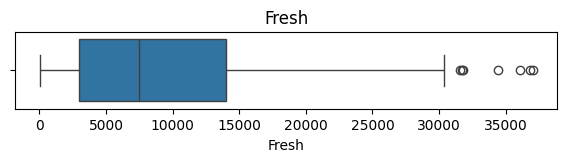

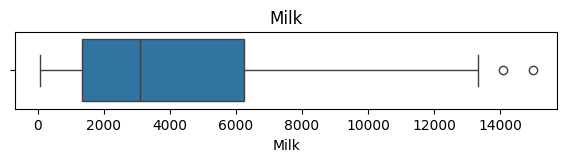

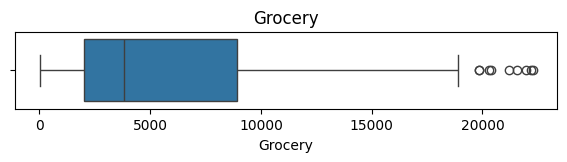

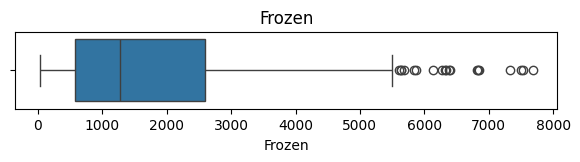

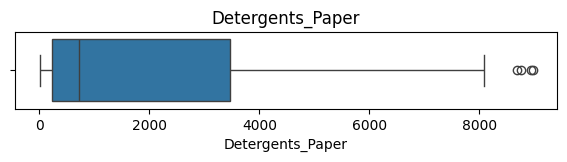

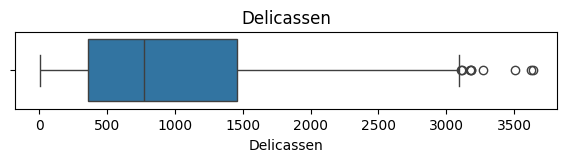

In [21]:
# Plot box plots for each continuous variable

for i,feature in enumerate(cont_features):
    plt.figure(figsize=(7,1))
    sns.boxplot(x = feature, data = df_cleaned)
    plt.title(feature)
    plt.show()

### See how total amount spent by customers vary between different channels and regions

In [22]:
# Create a new column 'Total_spending' which gives the total amount spent by customers
df_cleaned['Total_spending'] = df_cleaned['Fresh'] + df_cleaned['Milk'] + df_cleaned['Grocery'] + df_cleaned['Frozen'] + df_cleaned['Detergents_Paper'] + df_cleaned['Delicassen']

In [23]:
# Group total spending by channel and region
group_df = df_cleaned.groupby(['Channel', 'Region'])['Total_spending'].sum()

In [24]:
group_df = group_df.reset_index()
group_df

Channel  Region  Total_spending
0  Horeca  Lisbon         1061782
1  Horeca   Other         3273098
2  Horeca   Porto          463685
3  Retail  Lisbon          295362
4  Retail   Other         2614381
5  Retail   Porto          381476

Text(0.5, 1.0, 'Total spending in region by channel')

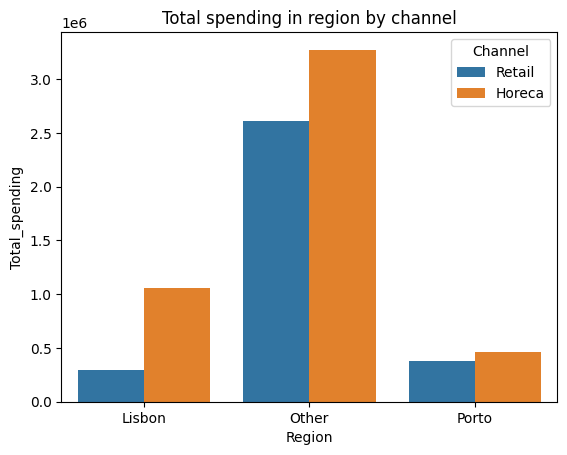

In [25]:
# Plot a barplot
palette = {
    'Retail': 'tab:blue',
    'Horeca': 'tab:orange'
}
sns.barplot(x = 'Region', y = 'Total_spending', data = group_df, hue = 'Channel', palette = palette, hue_order = ['Retail', 'Horeca'])
plt.title('Total spending in region by channel')

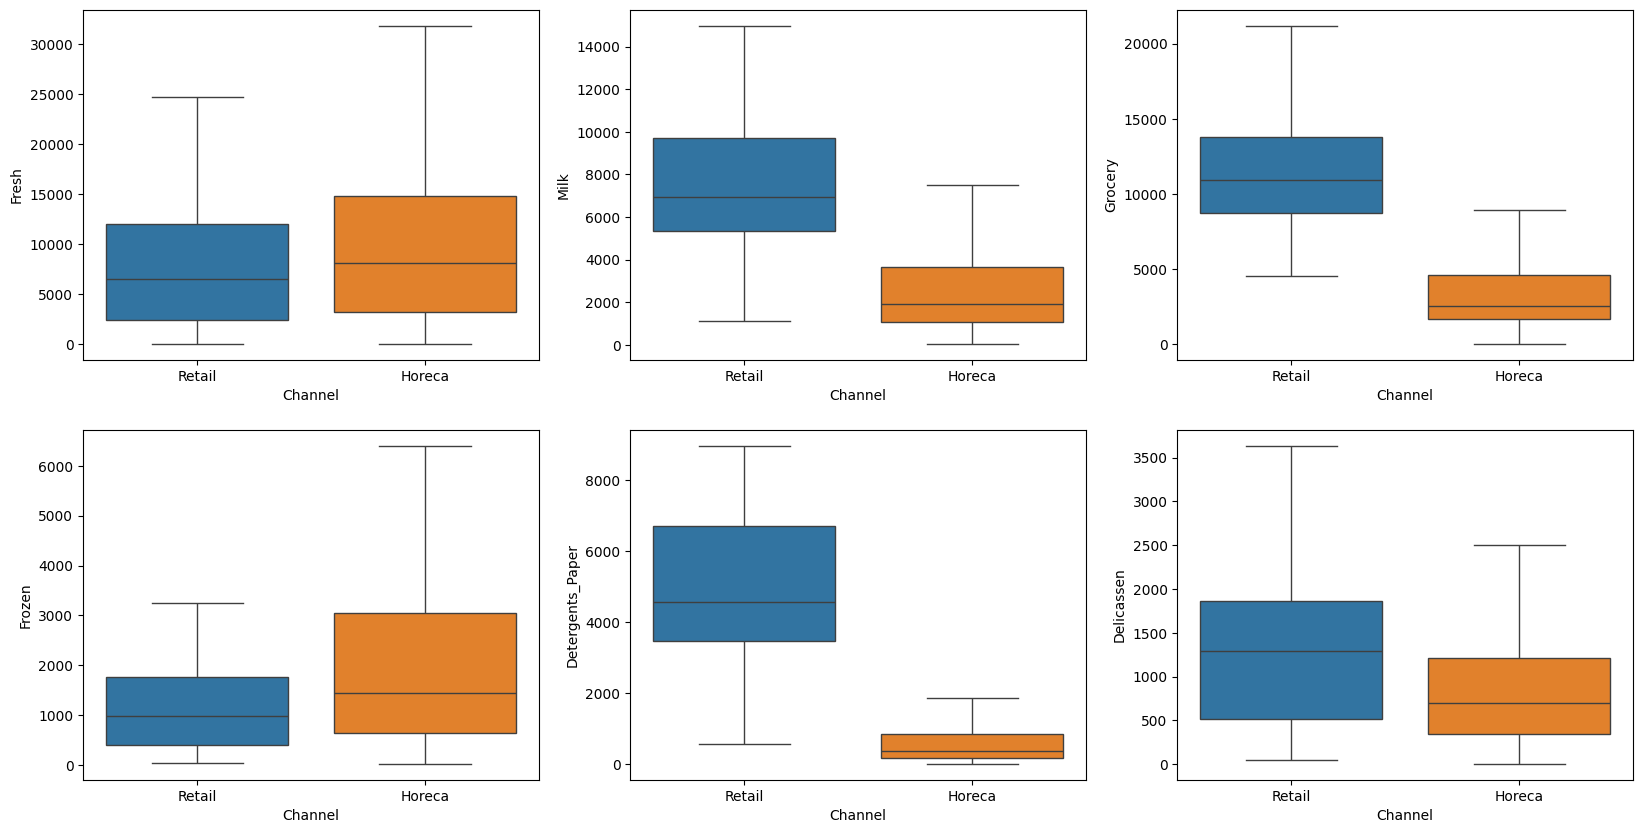

<Figure size 700x100 with 0 Axes>

<Figure size 700x100 with 0 Axes>

<Figure size 700x100 with 0 Axes>

<Figure size 700x100 with 0 Axes>

<Figure size 700x100 with 0 Axes>

<Figure size 700x100 with 0 Axes>

In [26]:
# Plot box plots to compare spendings on products in each channel

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
axes= [ax for axes_row in axes for ax in axes_row]

for i,feature in enumerate(cont_features):
    plt.figure(figsize=(7,1))
    sns.boxplot(x = 'Channel', y = feature, data = df_cleaned, ax = axes[i], hue = 'Channel', showfliers = False)
    
plt.tight_layout()
plt.show()

### See how spending on items vary between different channels and regions

In [27]:
# Group average spending for each item by channel
item = df_cleaned.drop(['Region', 'Total_spending'], axis =1)
item_group = item.groupby(['Channel']).mean()
item_group

Fresh         Milk       Grocery       Frozen  \
Channel                                                         
Horeca   10132.848101  2768.472574   3575.088608  2078.540084   
Retail    8086.852632  7439.915789  11614.821053  1325.452632   

         Detergents_Paper   Delicassen  
Channel                                 
Horeca         795.421941   896.738397  
Retail        4861.736842  1315.631579

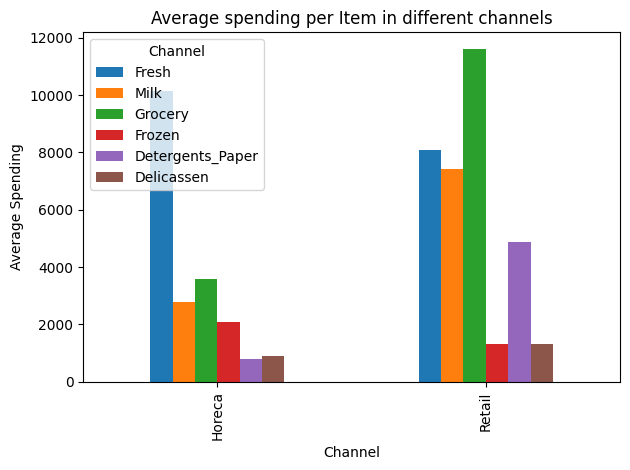

In [28]:
# Plot a bar plot to see the mean spending on each type of item by channel

item_group.plot(kind='bar')
plt.ylabel('Average Spending')
plt.xlabel('Channel')
plt.title('Average spending per Item in different channels')
plt.legend(title = 'Channel')
plt.tight_layout()
plt.show()

<Figure size 700x100 with 0 Axes>

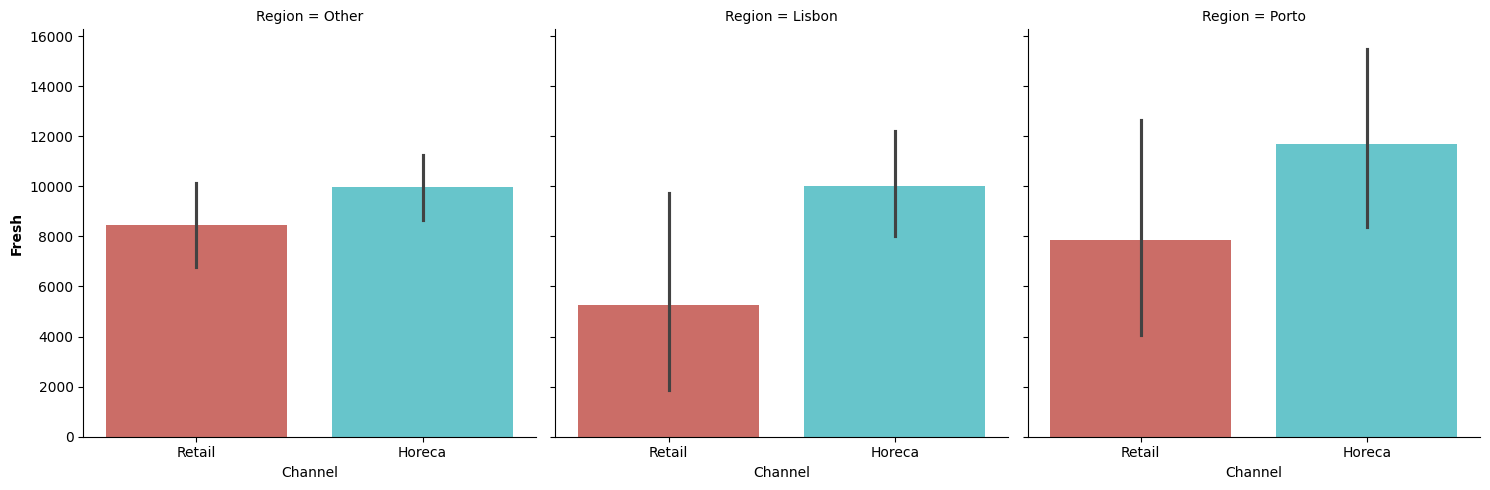

<Figure size 700x100 with 0 Axes>

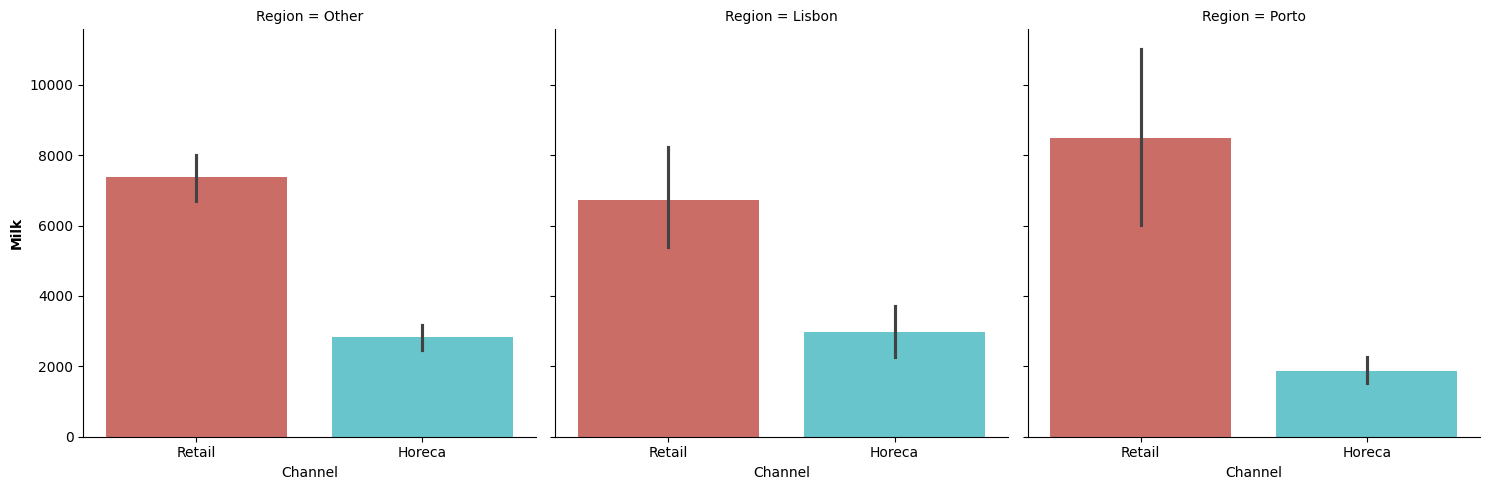

<Figure size 700x100 with 0 Axes>

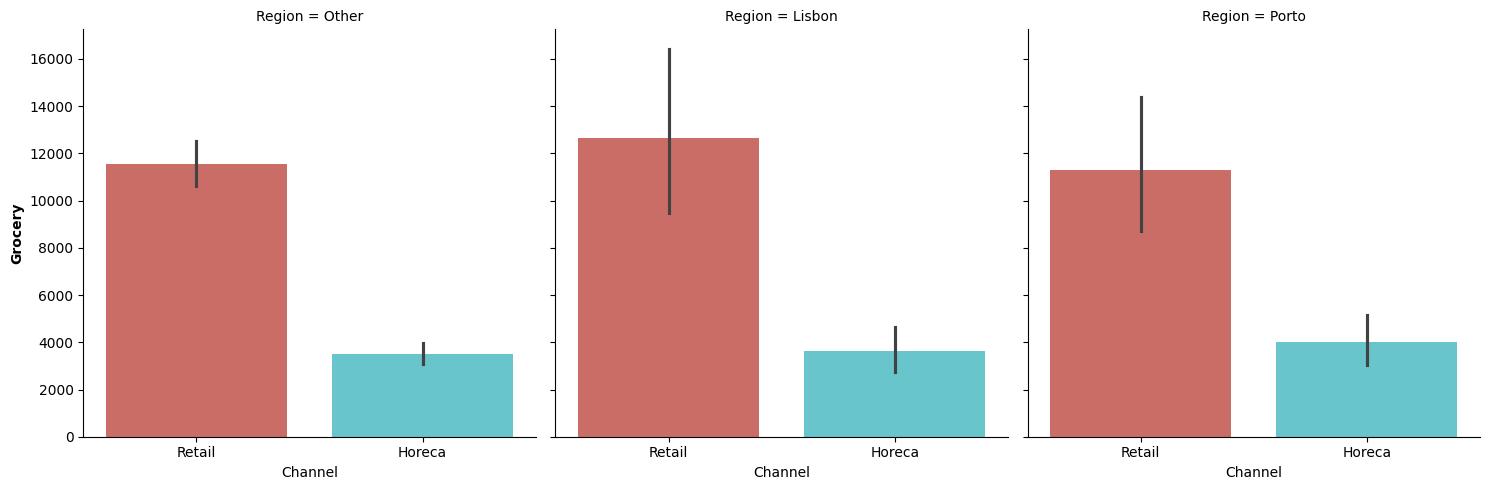

<Figure size 700x100 with 0 Axes>

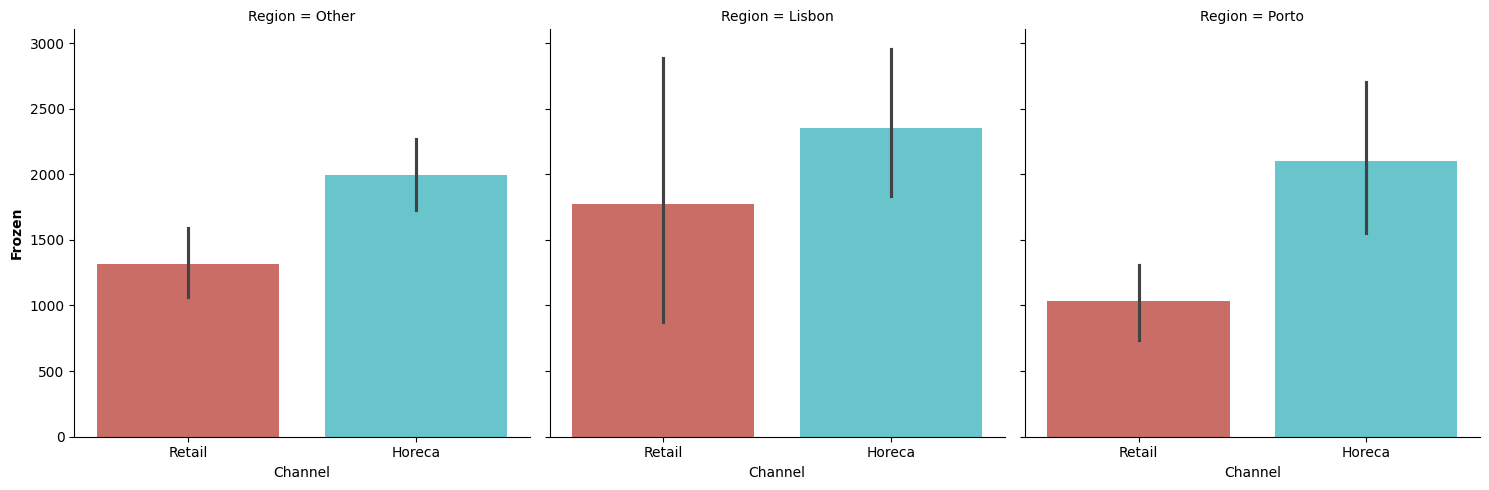

<Figure size 700x100 with 0 Axes>

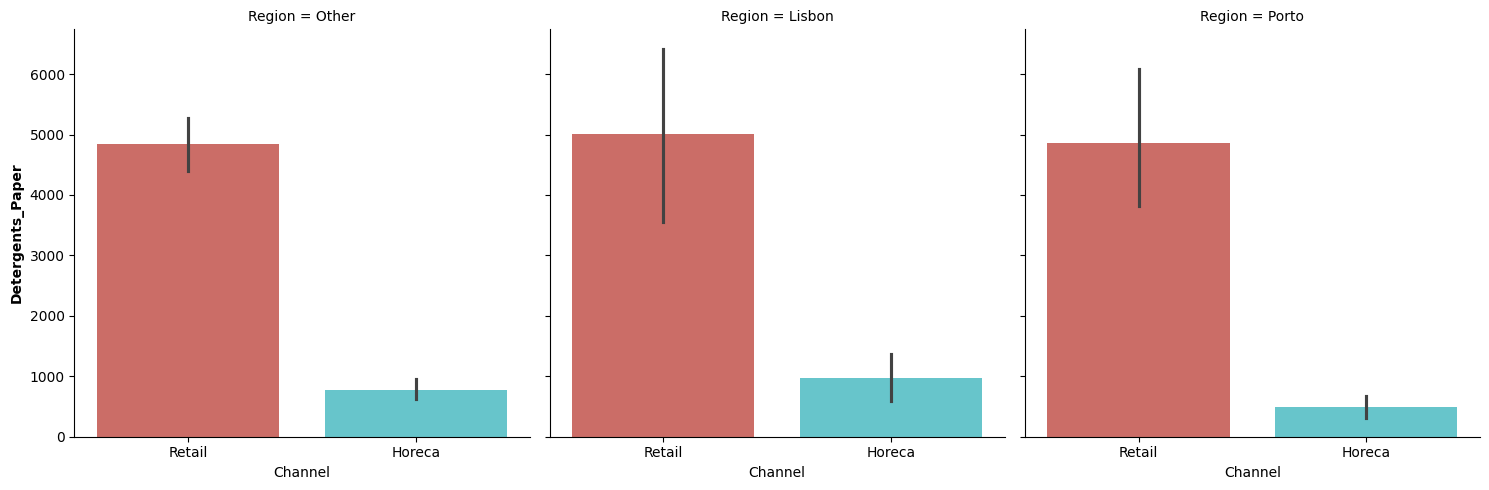

<Figure size 700x100 with 0 Axes>

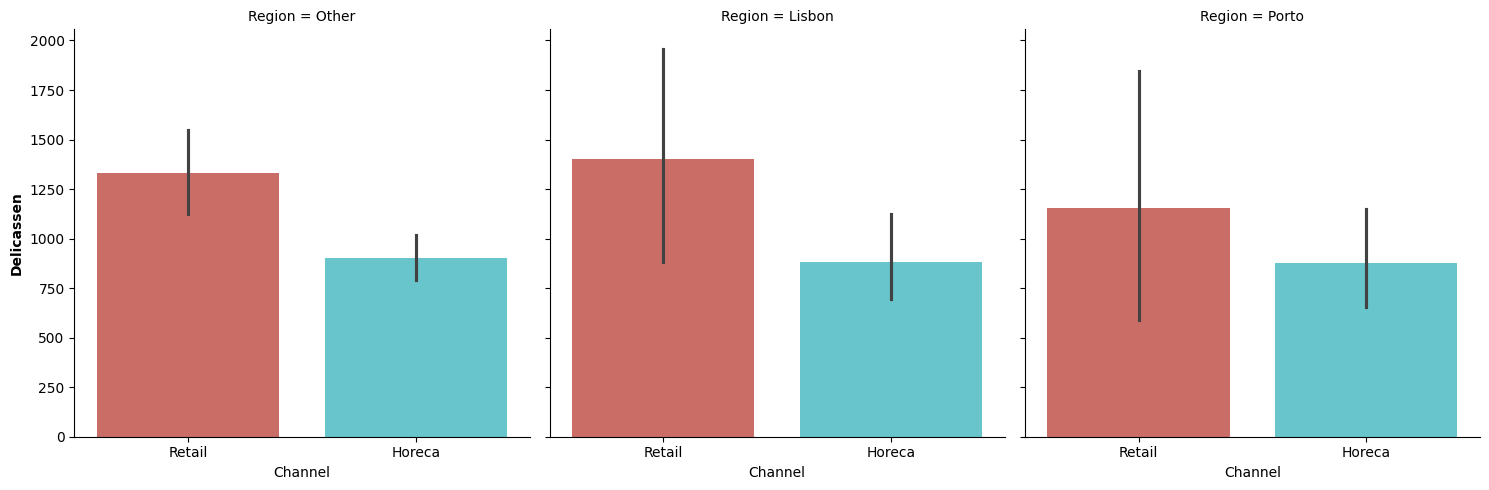

In [29]:
# Plot bar plots to compare spendings on items vary between different channels and regions

for i,feature in enumerate(cont_features):
    plt.figure(figsize=(7,1))
    ax = sns.catplot(x = 'Channel', y = feature, data = df_cleaned, hue = 'Channel', col='Region', kind = 'bar', palette='hls')
    ax.axes.flat[0].yaxis.label.set_weight('bold') 
        
plt.tight_layout()
plt.show()

### See relationships between variables using scatter plots

In [30]:
# Remove 'Total_spending' column
df_cleaned = df_cleaned.drop('Total_spending', axis = 1)

In [31]:
# Replace the values in 'Region' and 'Channel' columns back to the original encoded values
df_cleaned['Region'] = df_cleaned['Region'].replace(['Lisbon', 'Porto', 'Other'], [1,2,3]) 
df_cleaned['Channel'] = df_cleaned['Channel'].replace(['Horeca', 'Retail'], [1,2])

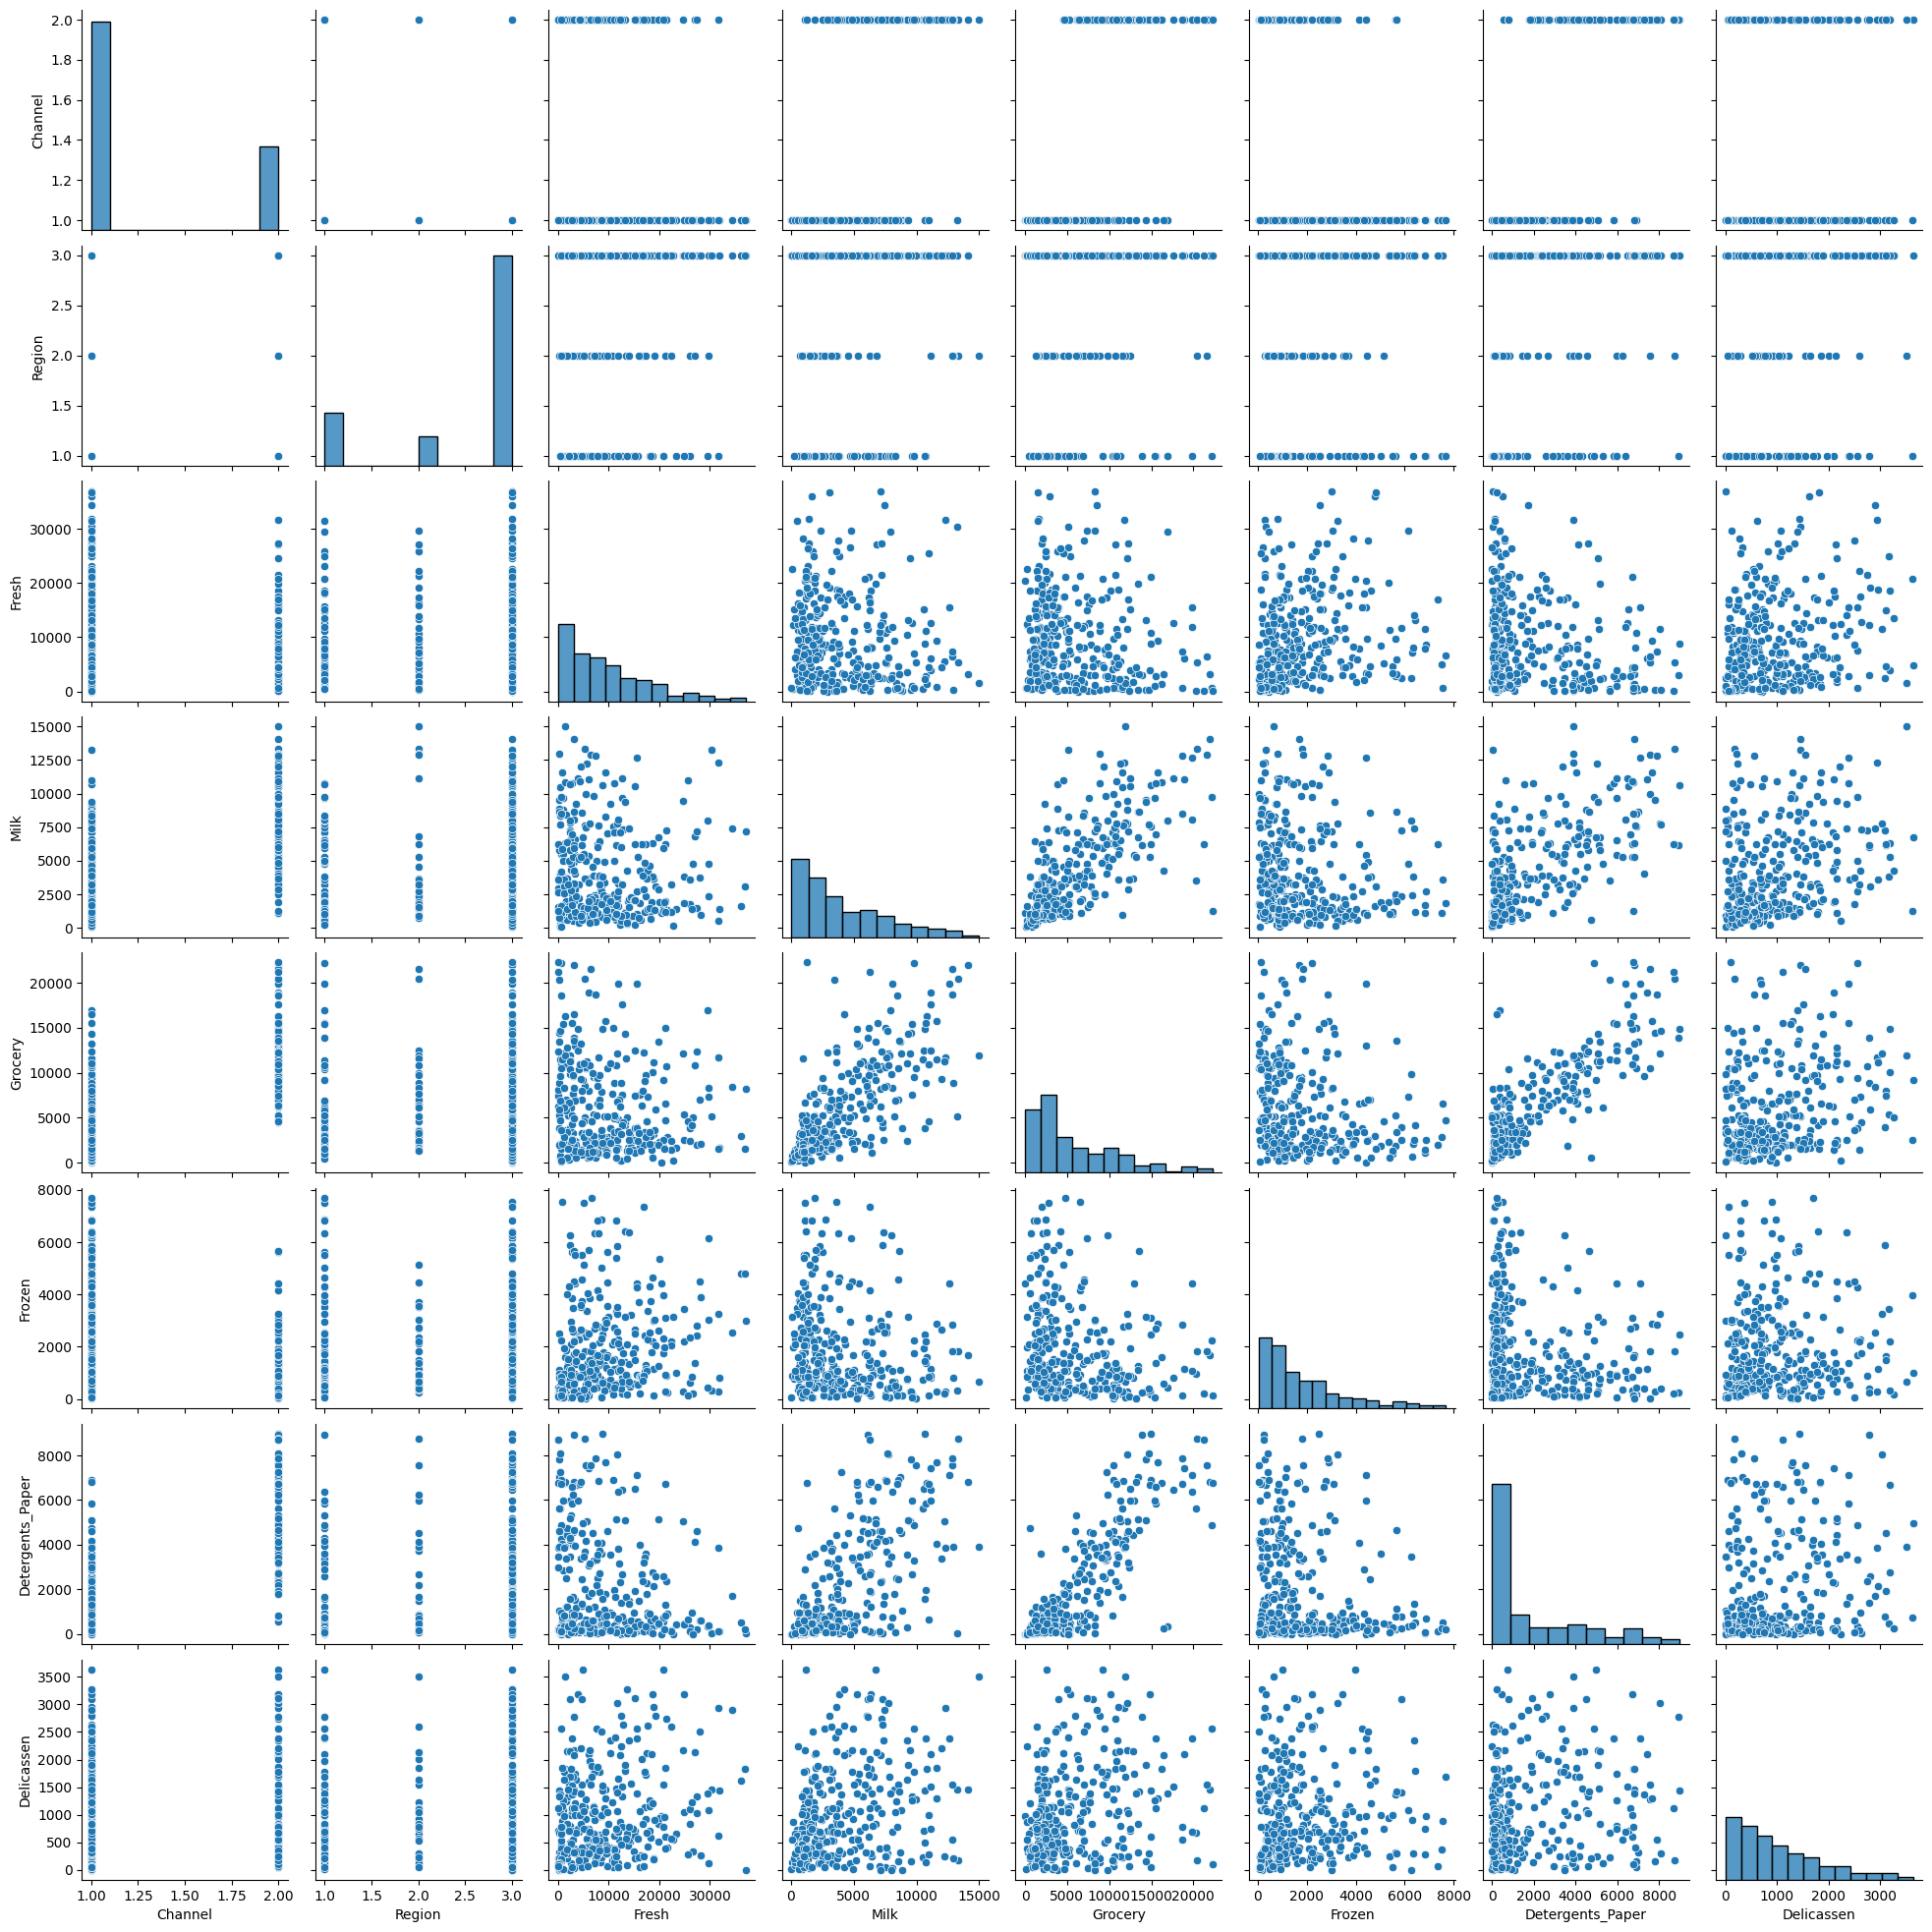

In [32]:
# Scatter plots
sns.pairplot(df_cleaned)

<Axes: >

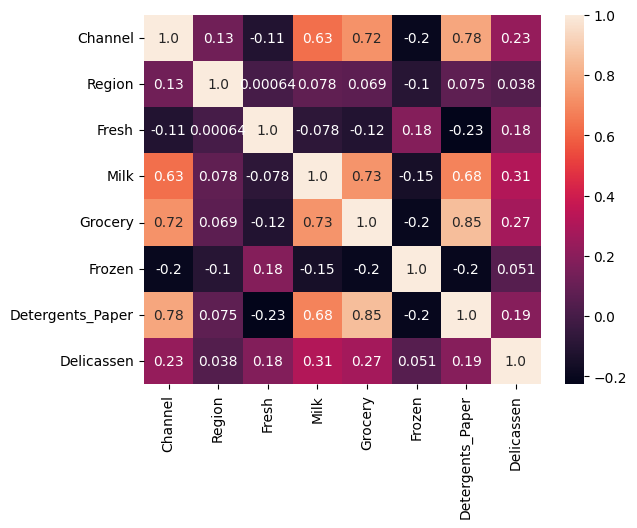

In [33]:
# Correlation heatmap
sns.heatmap(df_cleaned.corr(), annot=True, fmt='.2')

# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_cleaned)

# Principal Component Analysis

In [35]:
# Fit the scaled data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

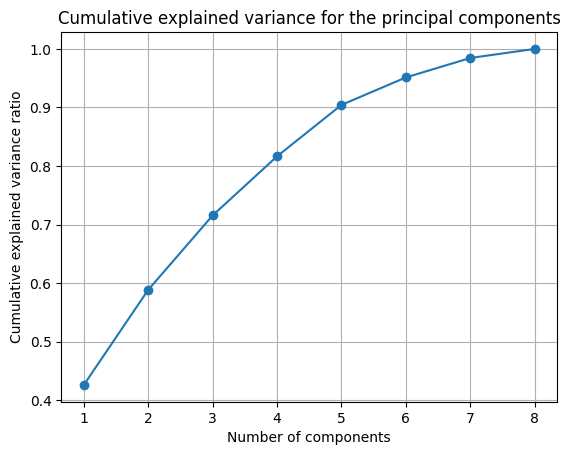

In [36]:
# Find the cumulative explained variance ratio and plot them to find the ideal number of components

plt.plot(range(1, len(df_cleaned.columns)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-')
plt.title('Cumulative explained variance for the principal components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.grid(True)
plt.show()

The marginal increase in the cumulative explained variance ratio for an additional component reduces when the no. of components is 6. Therefore we choose 6 components.

In [37]:
# Fit 6 principal components
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

In [38]:
# Find correlation coefficients for each feature with each PCA

# Get the no. of components
n_features = pca.n_features_in_

# Get the feature names
features_names = df_cleaned.columns

# Create a list of principal components names
pc_list = ['PC{}'.format(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]

# Create a dictionary to map the PCs to their loadings
pc_loadings = dict(zip(pc_list, pca.components_))

# Convert dictionary to pandas dataframe
loadings_df = pd.DataFrame.from_dict(pc_loadings)

# Add column called "Feature" containing the original feature names
loadings_df['feature'] = features_names

loadings_df = loadings_df.set_index('feature')

In [39]:
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6
feature                                                                     
Channel           0.469705  0.005991 -0.001956  0.074330  0.166150 -0.543618
Region            0.078505 -0.058947 -0.922358  0.364512 -0.045206  0.039196
Fresh            -0.105623  0.645868 -0.204496 -0.316429  0.647752 -0.021871
Milk              0.454359  0.116929  0.046984  0.012289  0.024212  0.798923
Grocery           0.496433  0.038360  0.081185  0.033181  0.119778  0.029952
Frozen           -0.158594  0.475408  0.279285  0.818594 -0.008596 -0.008140
Detergents_Paper  0.498213 -0.072113  0.105863  0.125321  0.117988 -0.202975
Delicassen        0.189213  0.577051 -0.097095 -0.272811 -0.722385 -0.148409

<Axes: ylabel='feature'>

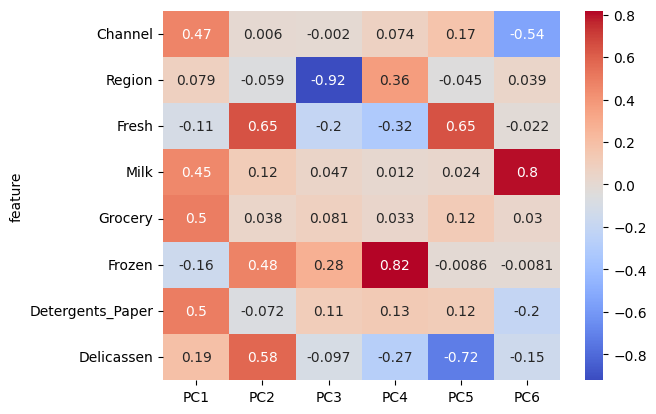

In [40]:
# Correlation between each principal component and feature
sns.heatmap(loadings_df, annot = True, fmt = '.2', cmap='coolwarm')

# K-means clustering

In [41]:
# Import K-means
from sklearn.cluster import KMeans

In [42]:
# Convert pca data to a dataframe
df_pca = pd.DataFrame(df_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [43]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6
0    2.044281  0.171793 -0.796529 -0.617157  0.326252  0.374699
1    2.424172  0.467264 -0.391356  0.245548 -0.431963  0.298380
2   -1.409707  1.993533 -0.116611  1.848599 -0.669723 -0.379641
3    1.454318  0.078813 -0.752666 -0.379383 -0.146284  0.090181
4    1.011908 -0.596653 -0.724544 -0.208136  0.940660 -1.062094
..        ...       ...       ...       ...       ...       ...
327 -1.038638 -0.093446 -1.108864 -0.892251  1.261607 -0.196277
328 -0.916833 -0.439783 -0.612475  0.046025 -1.302472  0.212845
329 -0.004126  0.075045 -0.844440 -0.580415  0.671628  0.319191
330 -0.956743  0.520680 -0.996940 -0.751765 -1.233652 -0.202537
331 -1.190720 -1.815735 -0.709004 -0.223116  0.014336  0.103581

[332 rows x 6 columns]

In [44]:
# To decide on the optimal number of clusters

int_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    int_list.append(kmeans.inertia_)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

Text(0, 0.5, 'Inertia')

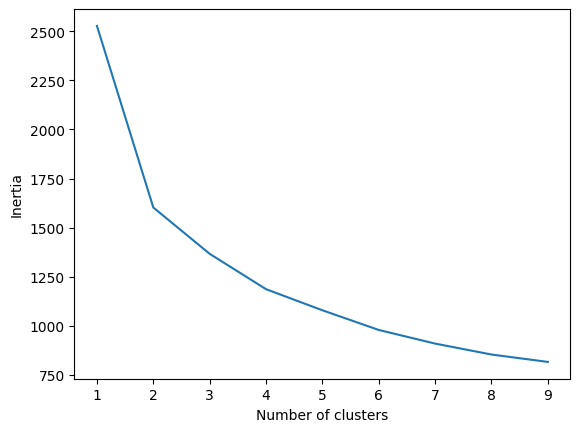

In [45]:
# Plot an elbow graph with number of clusters and inertia

clusters = range(1,10)
plt.plot(clusters, int_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The deviation is greatest when the number of clusters is 2. Therefore we will select 2 clusters.

In [46]:
# Form 2 clusters
kmeans = KMeans(n_clusters=2, random_state=9)

In [47]:
# Fit the model
y_kmeans = kmeans.fit_predict(df_pca)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [48]:
# Create a new column 'Cluster' to show in which cluster the point lies
df_pca['Cluster'] = y_kmeans

In [49]:
# View the data
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6  Cluster
0  2.044281  0.171793 -0.796529 -0.617157  0.326252  0.374699        0
1  2.424172  0.467264 -0.391356  0.245548 -0.431963  0.298380        0
2 -1.409707  1.993533 -0.116611  1.848599 -0.669723 -0.379641        1
3  1.454318  0.078813 -0.752666 -0.379383 -0.146284  0.090181        0
4  1.011908 -0.596653 -0.724544 -0.208136  0.940660 -1.062094        0

In [50]:
# See how many points are in each cluster
df_pca['Cluster'].value_counts()

Cluster
1    231
0    101
Name: count, dtype: int64

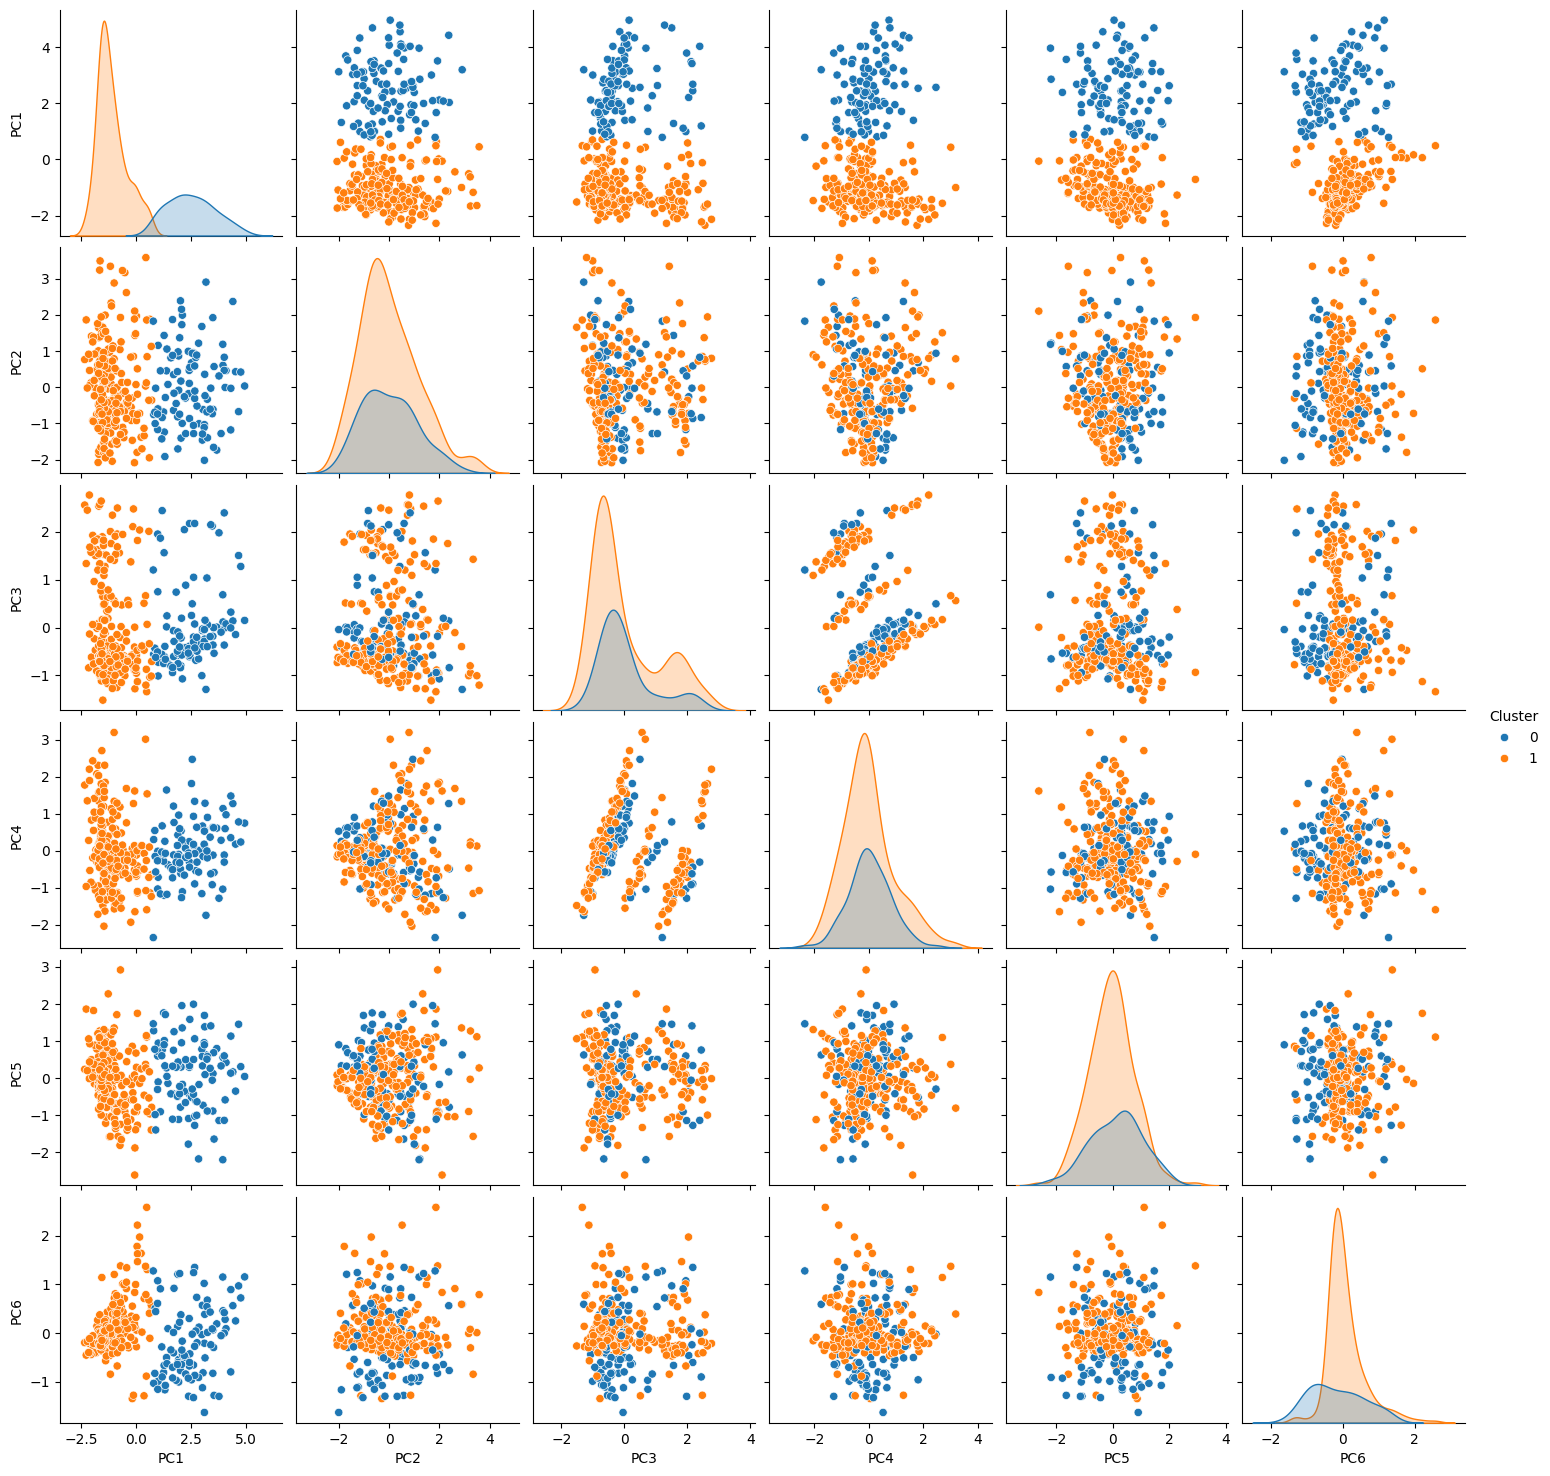

In [51]:
# Plot scatterplots to see how the clusters are formed
sns.pairplot(data = df_pca, hue = 'Cluster')

We can see that between PC1 and the other components, there are no noticeable intersections between the 2 clusters.

# Hierachical clustering

In [52]:
import scipy.cluster.hierarchy as sch

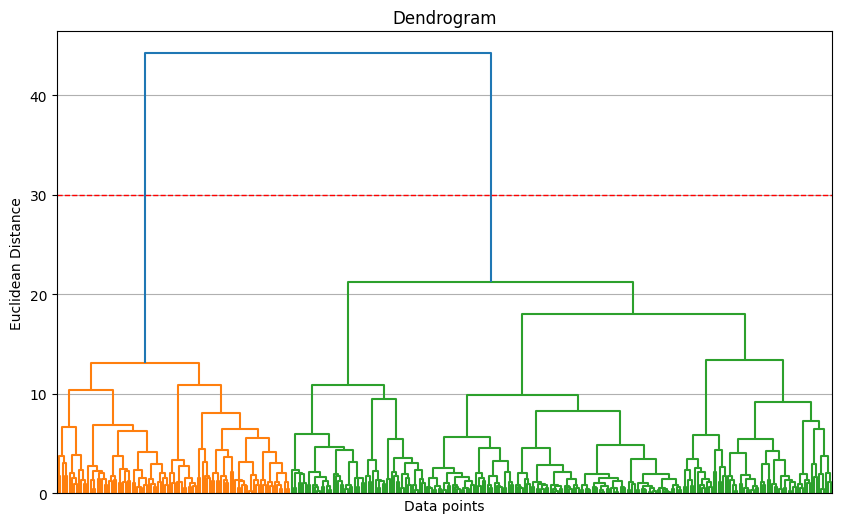

In [54]:
# Plot a dendrogram

plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(df_pca,method ='ward'))
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.grid(True)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.axhline(y = 30, c = 'red', lw = 1, linestyle = 'dashed')
plt.show()

# 2. REGRESSION

Regression dataset source link: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the CO2 emissions dataset
df = pd.read_csv(r'D:\BSC\3rd year\Machine Learning\Coursework\CO2 Emissions_Canada.csv')

In [3]:
# View the dataset
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [4]:
# Check the size of the dataset
df.shape

(7385, 12)

In [5]:
# View summary statistics
df.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

In [6]:
# View datatypes of columns and other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# Cleaning the dataset

In [7]:
# Rename some columns for simplicity 
    
columns_rename = {
    'Engine Size(L)': 'Engine_size',
    'Cylinders': 'Cylinders',
    'Fuel Consumption City (L/100 km)': 'Fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_cons_comb_L',
    'Fuel Consumption Comb (mpg)': 'Fuel_cons_comb_mpg',
    'CO2 Emissions(g/km)': 'CO2' }

df.rename(columns_rename, axis='columns', inplace=True)

In [8]:
# Check for duplicate entries
df[df.duplicated()]

Make       Model            Vehicle Class  Engine_size  \
1075         ACURA     RDX AWD              SUV - SMALL          3.5   
1076         ACURA         RLX                 MID-SIZE          3.5   
1081    ALFA ROMEO          4C               TWO-SEATER          1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT          5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER          4.7   
...            ...         ...                      ...          ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD          5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT          2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT          1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT          1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT          2.0   

      Cylinders Transmission Fuel Type  Fuel_cons_city  Fuel_cons_hwy  \
1075          6          AS6         Z            12.1            8.7   
1076          6          AS6         Z            11.9            7.7   
1081          4          AM6         Z             9.7            6.9   
1082         12           A6         Z            18.0           12.6   
1084          8          AM7         Z            17.4           11.3   
...         ...          ...       ...             ...            ...   
7356          8          AS6         X            17.7           13.6   
7365          4           M6         X             9.8            7.3   
7366          4          AS8         X             7.8            5.9   
7367          4           M6         X             7.9            5.9   
7368          4          AM7         X             9.3            7.2   

      Fuel_cons_comb_L  Fuel_cons_comb_mpg  CO2  
1075              10.6                  27  244  
1076              10.0                  28  230  
1081               8.4                  34  193  
1082              15.6                  18  359  
1084              14.7                  19  338  
...                ...                 ...  ...  
7356              15.9                  18  371  
7365               8.7                  32  203  
7366               7.0                  40  162  
7367               7.0                  40  163  
7368               8.4                  34  196  

[1103 rows x 12 columns]

In [9]:
# Remove all duplicate rows
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(6282, 12)

Duplicate rows were present and removed.

In [10]:
# Find the % of null values in each column
df_cleaned.isnull().sum()*100/df.shape[0]

Make                  0.0
Model                 0.0
Vehicle Class         0.0
Engine_size           0.0
Cylinders             0.0
Transmission          0.0
Fuel Type             0.0
Fuel_cons_city        0.0
Fuel_cons_hwy         0.0
Fuel_cons_comb_L      0.0
Fuel_cons_comb_mpg    0.0
CO2                   0.0
dtype: float64

No null values are present in the dataset.

## Outlier removal

In [11]:
# Interquartile range method is used

# Define a function to remove outliers if the datatype of the column is numerical

def outliers(df):
    outliers = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lb = q1 - 1.5 * iqr
            ub = q3 + 1.5 * iqr
            outliers.extend(df[(df[col] < lb) | (df[col] > ub)].index)
    return df.drop(outliers)

In [12]:
# Remove outliers using the function
df_cleaned = outliers(df.copy())

In [13]:
# See if any outliers were removed
df_cleaned.shape

(6826, 12)

Outliers were present and removed.

# Exploratory Data Analysis

In [14]:
df_cleaned

Make        Model   Vehicle Class  Engine_size  Cylinders Transmission  \
0     ACURA          ILX         COMPACT          2.0          4          AS5   
1     ACURA          ILX         COMPACT          2.4          4           M6   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6          AS6   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6          AS6   
5     ACURA          RLX        MID-SIZE          3.5          6          AS6   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4          AS8   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4          AS8   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4          AS8   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4          AS8   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4          AS8   

     Fuel Type  Fuel_cons_city  Fuel_cons_hwy  Fuel_cons_comb_L  \
0            Z             9.9            6.7               8.5   
1            Z            11.2            7.7               9.6   
3            Z            12.7            9.1              11.1   
4            Z            12.1            8.7              10.6   
5            Z            11.9            7.7              10.0   
...        ...             ...            ...               ...   
7380         Z            10.7            7.7               9.4   
7381         Z            11.2            8.3               9.9   
7382         Z            11.7            8.6              10.3   
7383         Z            11.2            8.3               9.9   
7384         Z            12.2            8.7              10.7   

      Fuel_cons_comb_mpg  CO2  
0                     33  196  
1                     29  221  
3                     25  255  
4                     27  244  
5                     28  230  
...                  ...  ...  
7380                  30  219  
7381                  29  232  
7382                  27  240  
7383                  29  232  
7384                  26  248  

[6826 rows x 12 columns]

In [15]:
# Assign Fuel types names for better understanding

# Define a dictionary to map short codes to full names
fuel_type_name = {'X' : 'Regular gasoline', 
                  'Z' : 'Premium gasoline',
                  'D' : 'Diesel', 
                  'E' : 'Ethanol',
                  'N' : 'Natural gas'}

In [16]:
# Assign the full names to the Fuel Type column
df_cleaned['Fuel Type'] = df_cleaned['Fuel Type'].map(fuel_type_name)

In [17]:
df_cleaned['Fuel Type']

0       Premium gasoline
1       Premium gasoline
3       Premium gasoline
4       Premium gasoline
5       Premium gasoline
              ...       
7380    Premium gasoline
7381    Premium gasoline
7382    Premium gasoline
7383    Premium gasoline
7384    Premium gasoline
Name: Fuel Type, Length: 6826, dtype: object

Make
FORD             569
CHEVROLET        528
BMW              521
MERCEDES-BENZ    380
PORSCHE          376
TOYOTA           296
GMC              270
AUDI             268
NISSAN           257
JEEP             241
KIA              215
DODGE            205
MINI             204
HONDA            204
HYUNDAI          194
VOLKSWAGEN       194
MAZDA            180
LEXUS            166
JAGUAR           160
CADILLAC         156
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
MITSUBISHI        93
RAM               91
LINCOLN           89
CHRYSLER          87
LAND ROVER        77
FIAT              73
ACURA             71
MASERATI          61
ALFA ROMEO        30
GENESIS           25
SCION             22
ASTON MARTIN      22
BENTLEY           17
SMART              7
LAMBORGHINI        2
Name: count, dtype: int64


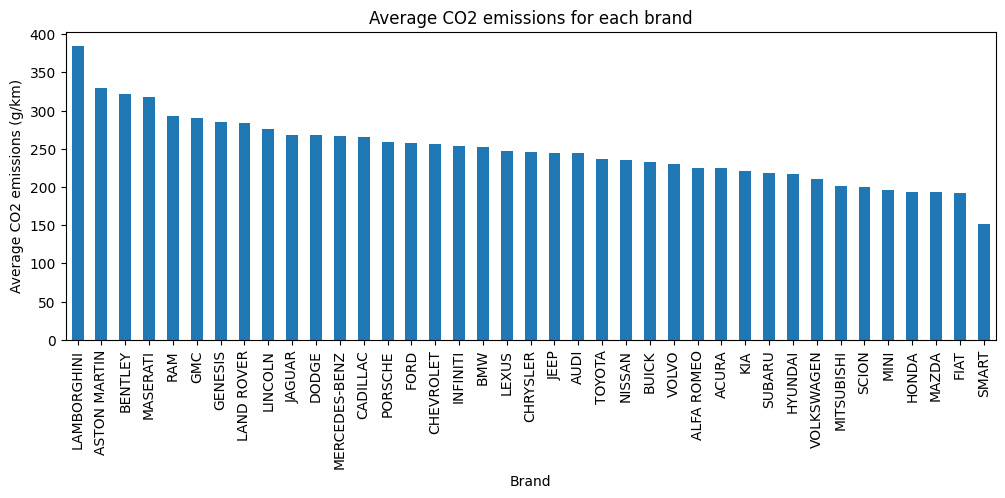

In [18]:
# Look at the different manufacturers
print(df_cleaned['Make'].value_counts())

# Get the average CO2 emissions for each manufacturer
avg_by_make = df_cleaned.groupby('Make')['CO2'].mean().sort_values(ascending = False)

# Plot the values in a bar graph
plt.figure(figsize=(12,4))
avg_by_make.plot(kind = "bar")
plt.xlabel('Brand')
plt.ylabel('Average CO2 emissions (g/km)')
plt.title('Average CO2 emissions for each brand')
plt.show()

Vehicle Class
SUV - SMALL                 1215
MID-SIZE                    1028
COMPACT                      979
SUV - STANDARD               657
SUBCOMPACT                   592
FULL-SIZE                    562
PICKUP TRUCK - STANDARD      465
TWO-SEATER                   390
MINICOMPACT                  311
STATION WAGON - SMALL        240
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
STATION WAGON - MID-SIZE      45
VAN - PASSENGER               16
VAN - CARGO                   10
Name: count, dtype: int64


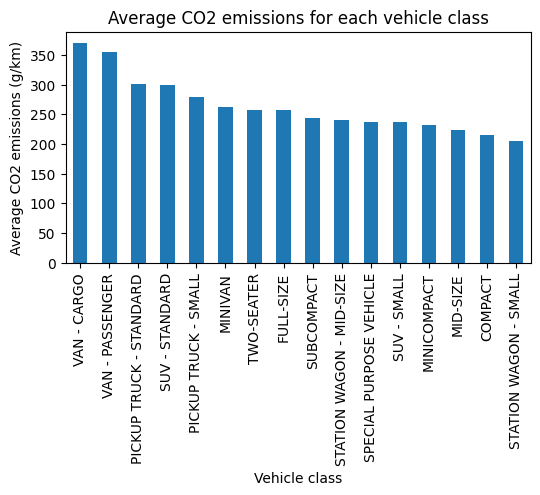

In [19]:
# Look at the different vehicle classes
print(df_cleaned['Vehicle Class'].value_counts())

# Get the average CO2 emissions for each vehicle class
avg_by_vclass = df_cleaned.groupby('Vehicle Class')['CO2'].mean().sort_values(ascending = False)

# Plot the values in a bar graph
plt.figure(figsize=(6,3))
avg_by_vclass.plot(kind = "bar")
plt.xlabel('Vehicle class')
plt.ylabel('Average CO2 emissions (g/km)')
plt.title('Average CO2 emissions for each vehicle class')
plt.show()

Transmission
AS6     1300
AS8     1125
M6       879
A6       672
A8       426
AM7      391
A9       334
AS7      294
AV       228
M5       193
AS10     156
AV7      117
AV6      103
AM6      102
M7        90
A5        78
AS9       77
AM8       59
A4        45
A7        41
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64


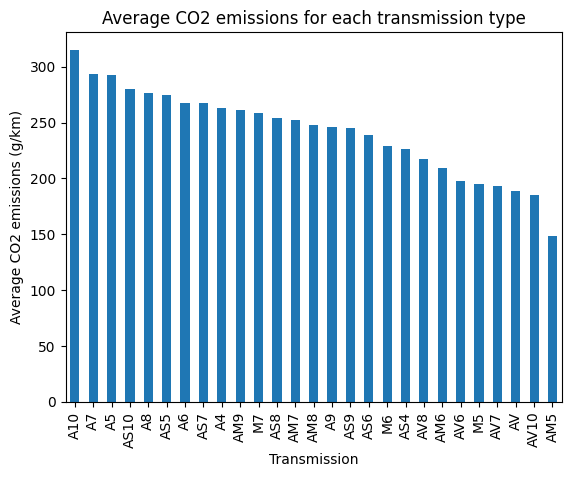

In [20]:
# Look at the different Transmissions
print(df_cleaned['Transmission'].value_counts())

# Get the average CO2 emissions for each transmission type
avg_by_transmission = df_cleaned.groupby('Transmission')['CO2'].mean().sort_values(ascending = False)

# Plot the values in a bar graph
avg_by_transmission.plot(kind = "bar")
plt.xlabel('Transmission')
plt.ylabel('Average CO2 emissions (g/km)')
plt.title('Average CO2 emissions for each transmission type')
plt.show()

In [21]:
# Look at the different Fuel types
print(df_cleaned['Fuel Type'].value_counts())

Fuel Type
Regular gasoline    3490
Premium gasoline    2934
Ethanol              226
Diesel               175
Natural gas            1
Name: count, dtype: int64


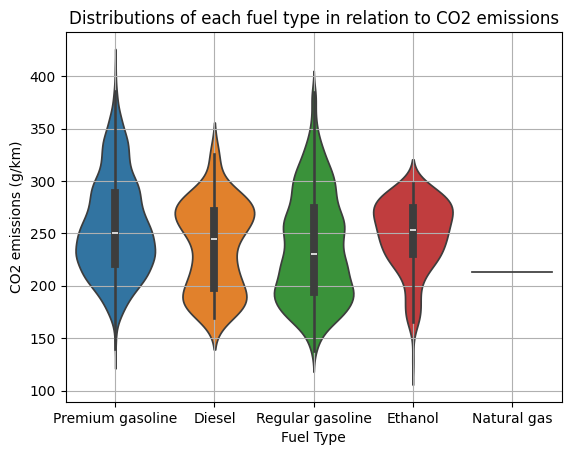

In [22]:
# Show the distributions of each fuel type using a violin plot
sns.violinplot(x = 'Fuel Type', y = 'CO2', data = df_cleaned, hue = 'Fuel Type')
plt.title('Distributions of each fuel type in relation to CO2 emissions')
plt.ylabel('CO2 emissions (g/km)')
plt.grid(True)

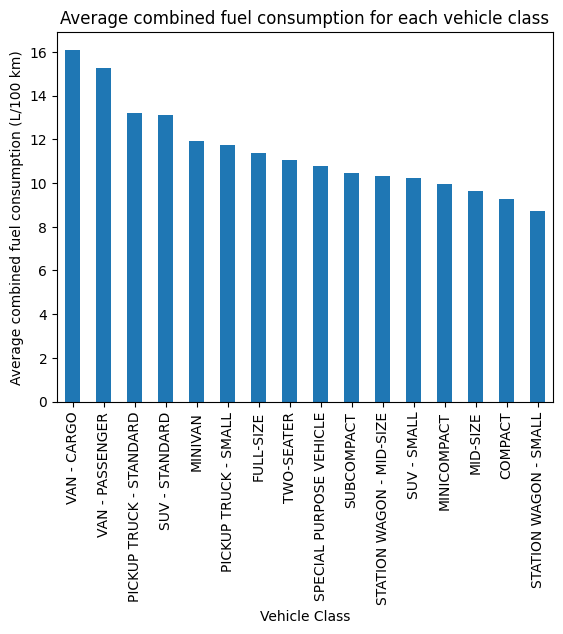

In [23]:
# See which vehicle classes consume more fuel

# Get the average CO2 emissions for each vehicle class
avg_fuel_cons_by_vclass = df_cleaned.groupby('Vehicle Class')['Fuel_cons_comb_L'].mean().sort_values(ascending = False)

# Plot the bar graph
# Plot the values in a bar graph
avg_fuel_cons_by_vclass.plot(kind = "bar")
plt.xlabel('Vehicle Class')
plt.ylabel('Average combined fuel consumption (L/100 km)')
plt.title('Average combined fuel consumption for each vehicle class')
plt.show()

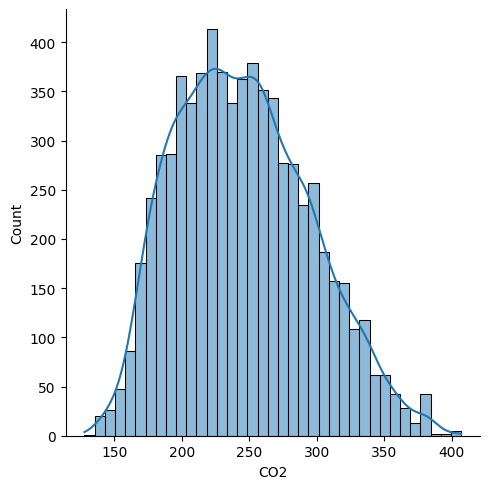

In [24]:
# View the distribution of the target variable

sns.displot(kde = True, data = df_cleaned, x = 'CO2')

## We look at how the continuous predictor variables affect the target variable

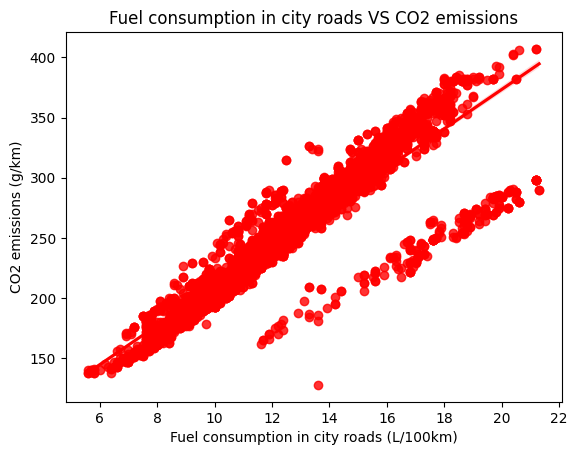

In [25]:
# Effect of Fuel consumption in city roads on level of CO2 emissions

sns.regplot(x = 'Fuel_cons_city', y = 'CO2', data = df_cleaned, color = 'red')
plt.title('Fuel consumption in city roads VS CO2 emissions')
plt.xlabel('Fuel consumption in city roads (L/100km)')
plt.ylabel('CO2 emissions (g/km)')
plt.show()

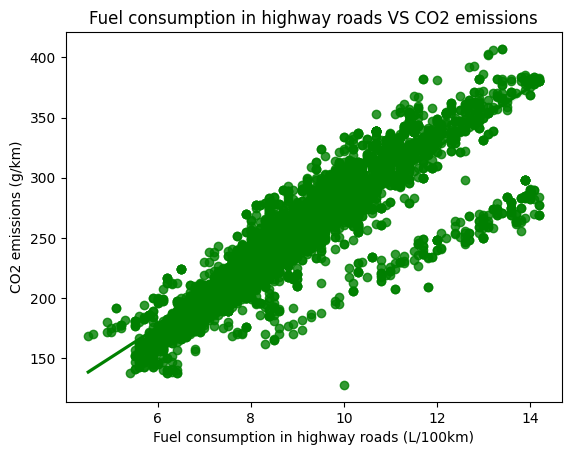

In [26]:
# Effect of Fuel consumption highway roads on level of CO2 emissions

sns.regplot(x = 'Fuel_cons_hwy', y = 'CO2', data = df_cleaned, color = 'green')
plt.title('Fuel consumption in highway roads VS CO2 emissions')
plt.xlabel('Fuel consumption in highway roads (L/100km)')
plt.ylabel('CO2 emissions (g/km)')
plt.show()

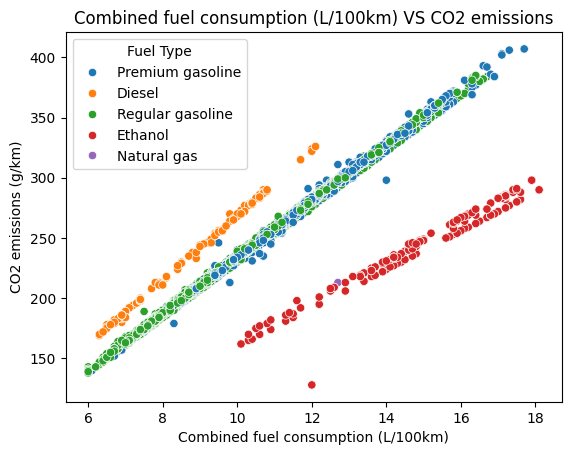

In [27]:
# Effect of combined fuel consumption in litres on level of CO2 emissions in vehicles using different fuel types

sns.scatterplot(x = 'Fuel_cons_comb_L', y = 'CO2', data = df_cleaned, hue = 'Fuel Type')
plt.title('Combined fuel consumption (L/100km) VS CO2 emissions')
plt.xlabel('Combined fuel consumption (L/100km)')
plt.ylabel('CO2 emissions (g/km)')
plt.show()

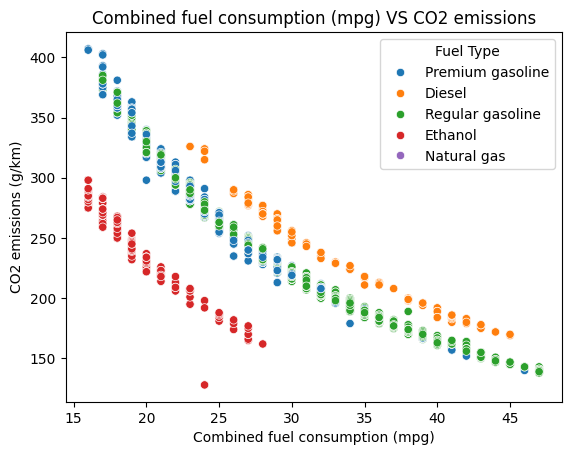

In [28]:
# Effect of combined fuel consumption in miles per gallon on level of CO2 emissions using different fuel types

sns.scatterplot(x = 'Fuel_cons_comb_mpg', y = 'CO2', data = df_cleaned, hue = 'Fuel Type')
plt.title('Combined fuel consumption (mpg) VS CO2 emissions')
plt.xlabel('Combined fuel consumption (mpg)')
plt.ylabel('CO2 emissions (g/km)')
plt.show()

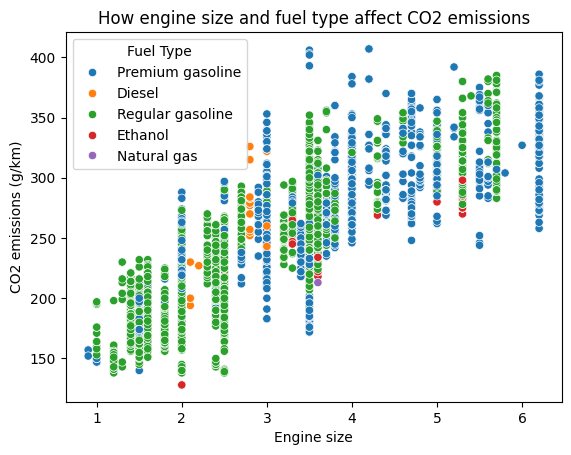

In [29]:
# Scatterplot to see how engine size and fuel type affect CO2 emissions

sns.scatterplot(x = 'Engine_size', y = 'CO2', data = df_cleaned, hue = 'Fuel Type')
plt.title('How engine size and fuel type affect CO2 emissions')
plt.xlabel('Engine size')
plt.ylabel('CO2 emissions (g/km)')
plt.show()

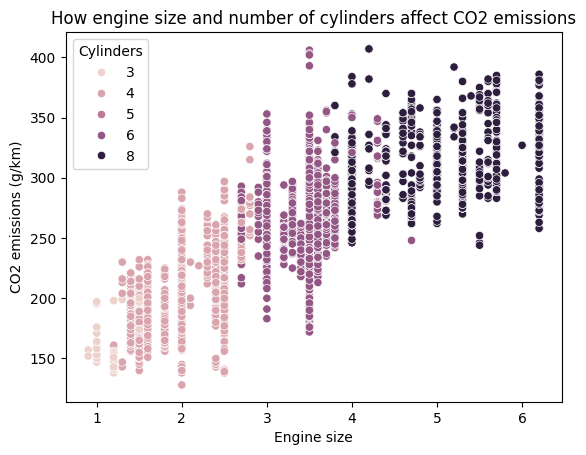

In [30]:
# Scatterplot to see how engine size and number of cylinders affect CO2 emissions

sns.scatterplot(x = 'Engine_size', y = 'CO2', data = df_cleaned, hue = 'Cylinders')
plt.title('How engine size and number of cylinders affect CO2 emissions')
plt.xlabel('Engine size')
plt.ylabel('CO2 emissions (g/km)')
plt.show()

In [31]:
df_cleaned.dtypes

Make                   object
Model                  object
Vehicle Class          object
Engine_size           float64
Cylinders               int64
Transmission           object
Fuel Type              object
Fuel_cons_city        float64
Fuel_cons_hwy         float64
Fuel_cons_comb_L      float64
Fuel_cons_comb_mpg      int64
CO2                     int64
dtype: object

In [32]:
# Remove all the non-numerical columns to plot the correlation heatmap

df_cleaned = df_cleaned.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis = 1)

[Text(0.5, 0, 'Engine_size'),
 Text(1.5, 0, 'Cylinders'),
 Text(2.5, 0, 'Fuel_cons_city'),
 Text(3.5, 0, 'Fuel_cons_hwy'),
 Text(4.5, 0, 'Fuel_cons_comb_L'),
 Text(5.5, 0, 'Fuel_cons_comb_mpg'),
 Text(6.5, 0, 'CO2')]

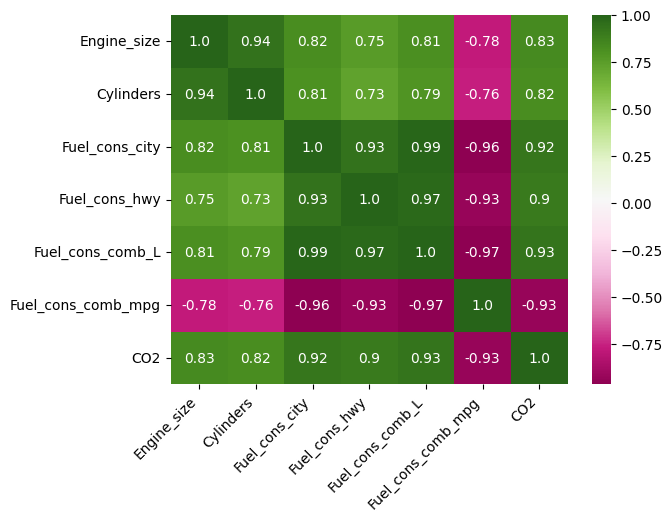

In [33]:
# Correlation heatmap
ax = sns.heatmap(df_cleaned.corr(), annot = True, fmt = '.2', cmap = 'PiYG')
ax.set_xticklabels(df_cleaned.columns, rotation=45, ha='right')

Multicollinearity exists among all features therefore we find the best features using k-means

# Train test split

In [34]:
# Seperate the dataset into features and labels
features = df_cleaned.drop(['CO2'], axis = 1)
labels = df_cleaned['CO2']

In [35]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=97)

In [36]:
# View the shape of x_train and x_test
x_train.shape, x_test.shape

((5119, 6), (1707, 6))

# Feature selection

In [37]:
# We use the K best method 
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 3 features
model = SelectKBest(f_regression, k='all')

# Learn the relationship from train data
model.fit(x_train, y_train)

# Transform train and test data
x_train_new = model.transform(x_train)
x_test_new = model.transform(x_test)

# Scaling

In [38]:
# Import StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [39]:
# Fit and transform the x_train and x_test sets
x_train_scaled = std_scaler.fit_transform(x_train_new)
x_test_scaled = std_scaler.fit_transform(x_test_new)

# Modelling

In [40]:
# Import necessary metrics to evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
# Define a function to print the relevant scores for each model
def metrics(y_test, pred):
    print("Mean Squared Error     : {}".format(mean_squared_error(y_test, pred)))
    print("Mean Absolute Error    : {}".format(mean_absolute_error(y_test, pred)))
    print("R Squared              : {}".format(r2_score(y_test, pred)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, pred))))
    print("=======================================================")

## 1. Multiple linear regression

In [42]:
# Import the model
from sklearn.linear_model import LinearRegression

In [43]:
model_lr = LinearRegression()

In [44]:
# Train the model
model_lr.fit(x_train_scaled, y_train)

LinearRegression()

In [45]:
# Find model coefficients
model_lr.coef_

array([  6.59735307,   7.82094436, -10.85668906,   7.07433896,
        13.07698687, -26.39628871])

In [46]:
# Find model intercept
model_lr.intercept_

245.33483102168393

In [47]:
# Test the model
predictions = model_lr.predict(x_test_scaled)

In [48]:
# Check the scores
metrics(y_test, predictions)

Mean Squared Error     : 232.00075861994137
Mean Absolute Error    : 9.25136082360938
R Squared              : 0.9042946732412545
Root Mean Squared Error: 15.231571114627059


### Check whether the linear regression assumptions hold

In [49]:
# Find the residuals
residuals = y_test - predictions

Text(0.5, 1.0, 'Residuals vs predicted values')

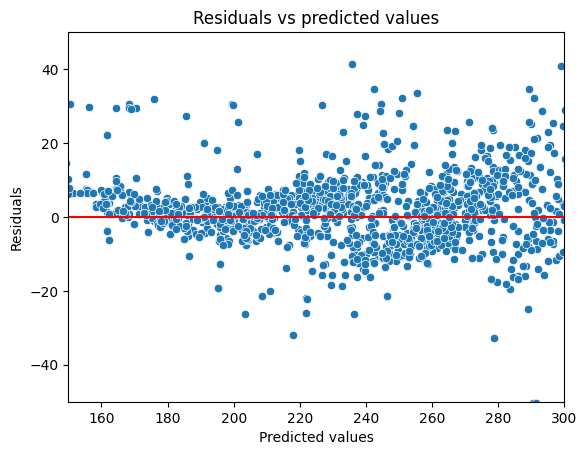

In [50]:
# Check if the assumption 'errors are homoscedastic' holds
plot = sns.scatterplot(x = predictions, y = residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.xlim(150,300)
plt.ylim(-50,50)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('Residuals vs predicted values')

The homoscedastic assumption holds as seen in the above plot

(-50.0, 50.0)

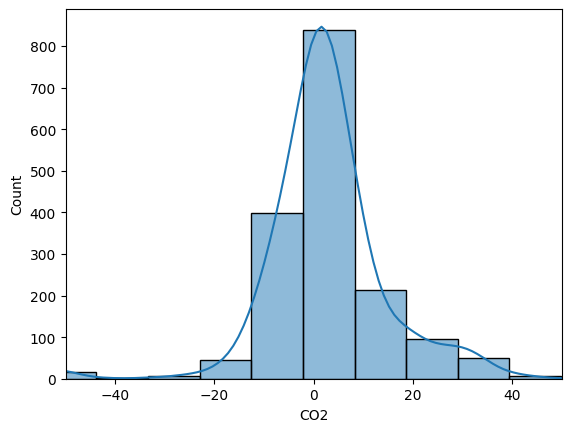

In [51]:
# Check if the assumption 'errors are normally distributed with mean zero and constant variance' holds
sns.histplot(residuals, bins = 20, kde = "True")
plt.xlim(-50,50)

Error terms seem to be normally distributed therefore the assumption holds

## 2. Decision tree regressor

In [52]:
# Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [53]:
model_dt = DecisionTreeRegressor()

# Get the default parameters
model_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [54]:
# Fit the model
model_dt.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [55]:
# Test the model
predictions = model_dt.predict(x_test_scaled)

In [56]:
# Check the scores
metrics(y_test, predictions)

Mean Squared Error     : 121.23543728195115
Mean Absolute Error    : 4.154565298985334
R Squared              : 0.949987762071002
Root Mean Squared Error: 11.010696493953104


### Hyperparameter tuning the decision tree regressor model

In [57]:
# Setup the hyperparameter space
param_grid_dt = {'max_depth': [3,4,5,6,7,9,10,12,15,18,20],
                'min_samples_leaf': [2,4,6,8,10,12,14],
                'max_features': ['sqrt','log2'],
                'max_leaf_nodes': [None, 10, 20, 30, 40]
                }

In [58]:
# Import GridSearchCV and RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [59]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=4)

grid_search_dt = GridSearchCV(estimator=model_dt,
                              param_grid=param_grid_dt,
                              scoring = 'neg_mean_squared_error',
                              cv = cv,
                              verbose = 1)

In [60]:
# Fitting gridsearch
grid_search_dt.fit(x_train_scaled,y_train)

Fitting 20 folds for each of 770 candidates, totalling 15400 fits


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=4),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 9, 10, 12, 15, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
# Get the best parameters for the model using gridsearch
grid_search_dt.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2}

In [62]:
# Fit the model using the best parameters
model_dt_tuned = DecisionTreeRegressor(max_depth = 12,
                                     max_features = 'sqrt',
                                     max_leaf_nodes = None,
                                     min_samples_leaf = 2,
                                     random_state = 1)

In [63]:
# Train the tuned model
model_dt_tuned.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                      random_state=1)

In [64]:
# Test the tuned model
predictions_tuned = model_dt_tuned.predict(x_test_scaled)

# Check the scores
metrics(y_test, predictions_tuned)

Mean Squared Error     : 93.08748641170587
Mean Absolute Error    : 4.060293493102909
R Squared              : 0.9615994001175786
Root Mean Squared Error: 9.648185653878446


## 3. Random forest regressor

In [65]:
# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
model_rf = RandomForestRegressor()

# Get the default parameters
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
# Fit the model
model_rf.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [68]:
# Test the model
predictions = model_rf.predict(x_test_scaled)

In [69]:
# Check the scores
metrics(y_test, predictions)

Mean Squared Error     : 80.67007182891234
Mean Absolute Error    : 3.874621162694757
R Squared              : 0.9667218519889188
Root Mean Squared Error: 8.981651954340713


### Hyperparameter tuning the random forest regressor model

In [70]:
# Setup the hyperparameter space
param_grid_rf = {
 'max_depth': [20,30],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,3],
 'n_estimators': [100,250],
 }

In [71]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=89)

grid_search_rf = GridSearchCV(estimator=model_rf,
                              param_grid=param_grid_rf,
                              scoring = 'neg_mean_squared_error',
                              cv = cv,
                              verbose = 3)

In [72]:
# Fitting gridsearch
grid_search_rf.fit(x_train_scaled,y_train)

Fitting 20 folds for each of 16 candidates, totalling 320 fits


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[CV 1/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-26.879 total time=   2.3s
[CV 2/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-49.861 total time=   2.4s
[CV 3/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-114.958 total time=   2.0s
[CV 4/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-54.738 total time=   3.1s
[CV 5/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-56.084 total time=   4.0s
[CV 6/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-48.448 total time=   3.9s
[CV 7/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-53.010 total time=   3.8s
[CV 8/20] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-53.284 total time=   3.9s
[CV 9/20] END max_depth=20, min

[CV 9/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-22.024 total time=  10.4s
[CV 10/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-23.085 total time=   8.4s
[CV 11/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-60.979 total time=   8.9s
[CV 12/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-31.024 total time=   9.5s
[CV 13/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-68.059 total time=   9.3s
[CV 14/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-48.304 total time=   7.3s
[CV 15/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-80.918 total time=   5.0s
[CV 16/20] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=250;, score=-59.711 total time=   4.0s
[CV 17/20] END max_depth=

[CV 17/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=-56.752 total time=   3.0s
[CV 18/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=-68.547 total time=   2.8s
[CV 19/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=-58.308 total time=   2.8s
[CV 20/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=-28.800 total time=   2.8s
[CV 1/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=250;, score=-44.025 total time=   4.1s
[CV 2/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=250;, score=-53.749 total time=   7.3s
[CV 3/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=250;, score=-122.388 total time=   7.4s
[CV 4/20] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=250;, score=-72.033 total time=   6.9s
[CV 5/20] END max_depth=20,

[CV 5/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-57.937 total time=   2.9s
[CV 6/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-47.152 total time=   3.2s
[CV 7/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-52.030 total time=   2.7s
[CV 8/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-55.609 total time=   2.7s
[CV 9/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-22.245 total time=   3.0s
[CV 10/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-22.754 total time=   3.0s
[CV 11/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-59.950 total time=   2.8s
[CV 12/20] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=-29.768 total time=   3.1s
[CV 13/20] END max_depth=30, 

[CV 13/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-73.590 total time=   5.1s
[CV 14/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-74.501 total time=   6.7s
[CV 15/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-87.438 total time=   4.9s
[CV 16/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-63.011 total time=   6.0s
[CV 17/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-55.897 total time=   5.6s
[CV 18/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-68.255 total time=   5.6s
[CV 19/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-57.876 total time=   7.4s
[CV 20/20] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=-29.135 total time=   5.3s
[CV 1/20] END max_depth=

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=89),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 250]},
             scoring='neg_mean_squared_error', verbose=3)

In [73]:
# Get the best parameters for the model using gridsearch
grid_search_rf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [74]:
# Fit the model using the best parameters
model_rf_tuned = RandomForestRegressor(max_depth = 20,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     n_estimators = 100,
                                     random_state = 1)

In [75]:
# Train the tuned model
model_rf_tuned.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=1)

In [76]:
# Test the tuned model
predictions_tuned = model_rf_tuned.predict(x_test_scaled)

# Check the scores
metrics(y_test, predictions_tuned)

Mean Squared Error     : 73.18857873163618
Mean Absolute Error    : 3.704304484340062
R Squared              : 0.9698081295760154
Root Mean Squared Error: 8.555032362980059


## 4. Polynomial regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
# Generate polynomial features

poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train_scaled)

In [79]:
# Fit the model

model_pr = LinearRegression()
model_pr.fit(x_train_poly, y_train)

LinearRegression()

In [80]:
# Test the model

x_test_poly = poly.fit_transform(x_test_scaled)
predictions = model_pr.predict(x_test_poly)

In [81]:
# Check the scores
metrics(y_test, predictions)

Mean Squared Error     : 145.11218171354287
Mean Absolute Error    : 6.088526180013271
R Squared              : 0.9401380889865101
Root Mean Squared Error: 12.046251770303611


## 5. Gradient boosting regressor

In [82]:
# Import gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
model_gb = GradientBoostingRegressor()

In [84]:
# Train the model
model_gb.fit(x_train_scaled, y_train)

GradientBoostingRegressor()

In [85]:
# Test the model
predictions = model_gb.predict(x_test_scaled)

# Check the scores
metrics(y_test, predictions)

Mean Squared Error     : 87.46338051529054
Mean Absolute Error    : 4.652464417759878
R Squared              : 0.9639194653438479
Root Mean Squared Error: 9.352185868303225


### Hyperparameter tuning the gradient boosting regressor model

In [86]:
# Setup the hyperparameter space
param_grid_gb = {
 'learning_rate': [0.5, 0.1, 0.01],
 'max_depth': [1,4,8],
 'min_samples_split': [2,3],
 'n_estimators': [100, 200],
 }

In [87]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=7)

grid_search_gb = GridSearchCV(estimator=model_gb,
                              param_grid=param_grid_gb,
                              scoring = 'neg_mean_squared_error',
                              cv = cv,
                              verbose = 3)

In [88]:
# Fitting gridsearch
grid_search_gb.fit(x_train_scaled,y_train)

Fitting 20 folds for each of 36 candidates, totalling 720 fits


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[CV 1/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-232.568 total time=   0.2s
[CV 2/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-195.492 total time=   0.2s
[CV 3/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-259.887 total time=   0.3s
[CV 4/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-197.410 total time=   0.2s
[CV 5/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-214.872 total time=   0.2s
[CV 6/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-227.654 total time=   0.3s
[CV 7/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-207.948 total time=   0.2s
[CV 8/20] END learning_rate=0.5, max_depth=1, min_samples_split=2, n_estimators=100;, score=-179.625 total time=   0.2s
[CV 9/20] END learning_rate=0.5, max_dep

[CV 9/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-147.468 total time=   0.5s
[CV 10/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-166.261 total time=   0.5s
[CV 11/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-164.241 total time=   0.6s
[CV 12/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-135.001 total time=   0.8s
[CV 13/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-218.913 total time=   0.7s
[CV 14/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-271.659 total time=   0.3s
[CV 15/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-166.284 total time=   0.2s
[CV 16/20] END learning_rate=0.5, max_depth=1, min_samples_split=3, n_estimators=200;, score=-158.414 total time=   0.3s
[CV 17/20] END learning_rate=0.5,

[CV 18/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=100;, score=-52.899 total time=   0.5s
[CV 19/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=100;, score=-38.878 total time=   0.3s
[CV 20/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=100;, score=-63.598 total time=   0.4s
[CV 1/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=200;, score=-77.307 total time=   0.8s
[CV 2/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=200;, score=-38.433 total time=   0.7s
[CV 3/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=200;, score=-71.013 total time=   0.8s
[CV 4/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=200;, score=-47.876 total time=   0.7s
[CV 5/20] END learning_rate=0.5, max_depth=4, min_samples_split=3, n_estimators=200;, score=-66.065 total time=   0.7s
[CV 6/20] END learning_rate=0.5, max_depth=4,

[CV 7/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-26.435 total time=   0.8s
[CV 8/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-27.487 total time=   0.8s
[CV 9/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-71.719 total time=   0.7s
[CV 10/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-76.141 total time=   0.9s
[CV 11/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-13.657 total time=   0.8s
[CV 12/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-63.263 total time=   1.6s
[CV 13/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-54.847 total time=   1.8s
[CV 14/20] END learning_rate=0.5, max_depth=8, min_samples_split=3, n_estimators=100;, score=-71.482 total time=   1.7s
[CV 15/20] END learning_rate=0.5, max_depth

[CV 16/20] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=200;, score=-168.167 total time=   0.6s
[CV 17/20] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=200;, score=-158.043 total time=   0.4s
[CV 18/20] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=200;, score=-230.911 total time=   0.6s
[CV 19/20] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=200;, score=-177.833 total time=   0.5s
[CV 20/20] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=200;, score=-200.064 total time=   0.5s
[CV 1/20] END learning_rate=0.1, max_depth=1, min_samples_split=3, n_estimators=100;, score=-252.894 total time=   0.2s
[CV 2/20] END learning_rate=0.1, max_depth=1, min_samples_split=3, n_estimators=100;, score=-175.414 total time=   0.2s
[CV 3/20] END learning_rate=0.1, max_depth=1, min_samples_split=3, n_estimators=100;, score=-272.199 total time=   0.2s
[CV 4/20] END learning_rate=0.1, ma

[CV 5/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-63.910 total time=   0.9s
[CV 6/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-39.501 total time=   0.8s
[CV 7/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-35.581 total time=   0.8s
[CV 8/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-39.072 total time=   0.8s
[CV 9/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-52.377 total time=   0.8s
[CV 10/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-64.984 total time=   0.8s
[CV 11/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-17.021 total time=   0.8s
[CV 12/20] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=200;, score=-42.051 total time=   0.7s
[CV 13/20] END learning_rate=0.1, max_depth=4

[CV 14/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100;, score=-74.570 total time=   0.7s
[CV 15/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100;, score=-28.240 total time=   0.7s
[CV 16/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100;, score=-58.851 total time=   0.8s
[CV 17/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100;, score=-39.757 total time=   0.8s
[CV 18/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100;, score=-38.812 total time=   0.8s
[CV 19/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100;, score=-28.463 total time=   0.8s
[CV 20/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100;, score=-47.904 total time=   0.8s
[CV 1/20] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=200;, score=-92.278 total time=   2.8s
[CV 2/20] END learning_rate=0.1, max_dept

[CV 3/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-1006.764 total time=   0.1s
[CV 4/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-928.670 total time=   0.1s
[CV 5/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-887.227 total time=   0.1s
[CV 6/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-850.957 total time=   0.1s
[CV 7/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-877.897 total time=   0.1s
[CV 8/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-884.857 total time=   0.1s
[CV 9/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-858.370 total time=   0.1s
[CV 10/20] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=-901.826 total time=   0.2s
[CV 11/20] END learning_rate=0

[CV 11/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-471.070 total time=   0.4s
[CV 12/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-468.262 total time=   0.3s
[CV 13/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-547.346 total time=   0.4s
[CV 14/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-549.952 total time=   0.4s
[CV 15/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-443.294 total time=   0.3s
[CV 16/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-422.567 total time=   0.3s
[CV 17/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-432.921 total time=   0.4s
[CV 18/20] END learning_rate=0.01, max_depth=1, min_samples_split=3, n_estimators=200;, score=-504.980 total time=   0.4s
[CV 19/20] END learning_

[CV 19/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=100;, score=-456.315 total time=   0.5s
[CV 20/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=100;, score=-456.222 total time=   0.4s
[CV 1/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=200;, score=-180.540 total time=   1.0s
[CV 2/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=200;, score=-133.586 total time=   1.1s
[CV 3/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=200;, score=-207.550 total time=   1.0s
[CV 4/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=200;, score=-157.815 total time=   1.0s
[CV 5/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=200;, score=-177.962 total time=   1.0s
[CV 6/20] END learning_rate=0.01, max_depth=4, min_samples_split=3, n_estimators=200;, score=-142.347 total time=   1.0s
[CV 7/20] END learning_rate=0.

[CV 7/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-367.700 total time=   1.1s
[CV 8/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-376.042 total time=   1.0s
[CV 9/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-373.901 total time=   1.0s
[CV 10/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-398.113 total time=   1.1s
[CV 11/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-350.117 total time=   1.1s
[CV 12/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-369.513 total time=   1.0s
[CV 13/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-405.773 total time=   1.1s
[CV 14/20] END learning_rate=0.01, max_depth=8, min_samples_split=3, n_estimators=100;, score=-408.048 total time=   1.2s
[CV 15/20] END learning_rat

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=7),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.5, 0.1, 0.01],
                         'max_depth': [1, 4, 8], 'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=3)

In [89]:
# Get the best parameters for the model using gridsearch
grid_search_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_split': 3,
 'n_estimators': 100}

In [90]:
# Fit the model using the best parameters
model_gb_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     max_depth = 8,
                                     min_samples_split = 3,
                                     n_estimators = 100,
                                     random_state = 38)

In [91]:
# Train the tuned model
model_gb_tuned.fit(x_train_scaled, y_train)

GradientBoostingRegressor(max_depth=8, min_samples_split=3, random_state=38)

In [92]:
# Test the tuned model
predictions_tuned = model_gb_tuned.predict(x_test_scaled)

# Check the scores
metrics(y_test, predictions_tuned)

Mean Squared Error     : 87.42978712732275
Mean Absolute Error    : 3.9563111156993864
R Squared              : 0.9639333233423799
Root Mean Squared Error: 9.350389677832831


# 3. CLASSIFICATION

Classification dataset source link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
df = pd.read_csv('D:/BSc/3rd year/Machine Learning/Coursework/diabetes.csv')

In [3]:
# Have a look at the dataset
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

If outcome = 1, Patient has diabeties

If outcome = 0, Patient does not have diabeties

In [4]:
# Find the number of rows and columns
df.shape

(768, 9)

In [5]:
# View summary statistics
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
# Other information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cleaning the dataset

In [7]:
# Find the % of null values in each column
df.isnull().sum()*100/df.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
# Check for duplicate entries
df[df.duplicated()]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

There are no duplicate values in the dataset

In [9]:
# Create a function to remove outliers

def outlier(df):  
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    df_cleaned = df[~((df < lb) | (df > ub)).any(axis=1)]
    return df_cleaned

In [10]:
# Remove outliers using the function
df_cleaned = outlier(df.copy())

In [11]:
# See if any outliers were removed
df_cleaned.shape

(639, 9)

In [12]:
df_cleaned

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[639 rows x 9 columns]

Outliers were present and were removed

# Exploratory Data Analysis

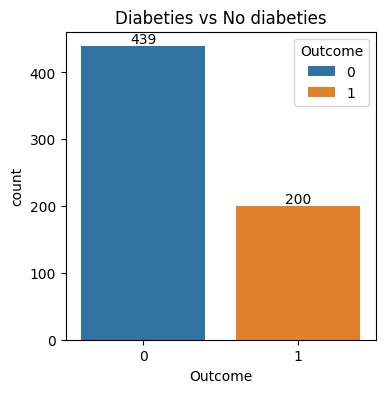

In [13]:
# Count plot of target variable(Outcome)

plt.figure(figsize=(4,4))
ax = sns.countplot(data = df_cleaned, x = 'Outcome', hue = 'Outcome')
plt.title('Diabeties vs No diabeties')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

There is class imbalance which we will deal with later.

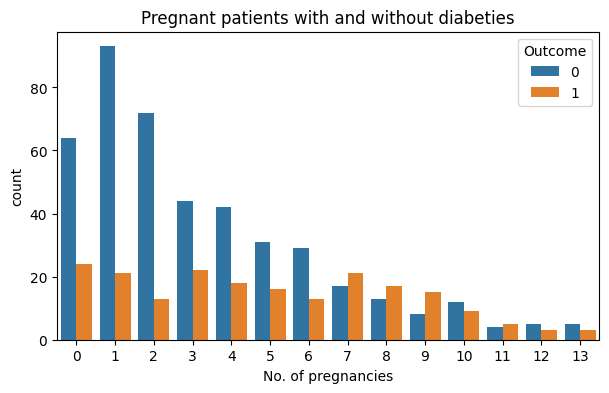

In [14]:
# Count plot of pregnant patients with and without diabeties
plt.figure(figsize=(7,4))
sns.countplot(data = df_cleaned, x = 'Pregnancies', hue = 'Outcome')
plt.title('Pregnant patients with and without diabeties')
plt.xlabel('No. of pregnancies')
plt.show()

In [15]:
# Define a function to create age groups

def Age_group(age):
    if age <= 30:
        return '20-30'
    elif 30 < age <= 40:
        return '30-40'
    elif 40 < age <= 50:
        return '40-50'
    elif 50 < age <= 60:
        return '50-60'
    else:
        return '60+'

df_cleaned['Age_group'] = df_cleaned['Age'].apply(lambda x: Age_group(x))

In [16]:
df_cleaned['Age_group'].value_counts()

Age_group
20-30    354
30-40    131
40-50     95
50-60     43
60+       16
Name: count, dtype: int64

Text(0.5, 1.0, 'Age vs. diabetic and non-diabetic patients')

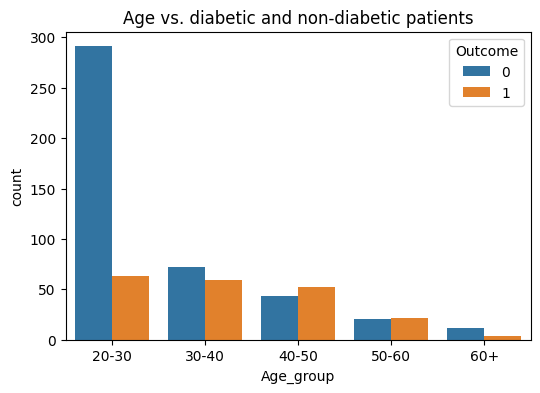

In [17]:
# Bar graph to show age with diabetic and non-diabetic patients
plt.figure(figsize=(6,4))
sns.countplot(data = df_cleaned, x = 'Age_group', hue = 'Outcome', order = ['20-30','30-40','40-50','50-60','60+'])
plt.title('Age vs. diabetic and non-diabetic patients')

Text(0.5, 0, 'Blood pressure (mm Hg)')

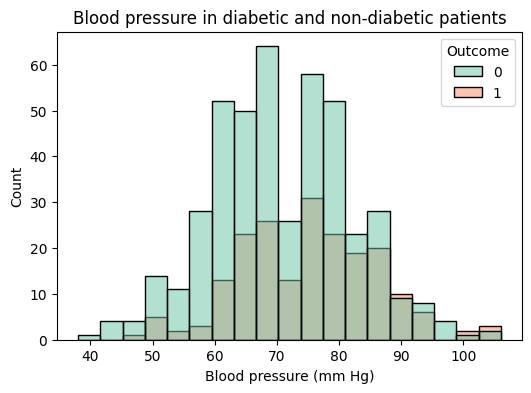

In [18]:
# Bar graph to show Blood pressure in diabetic and non-diabetic patients
plt.figure(figsize=(6,4))
sns.histplot(data = df_cleaned, x = 'BloodPressure', hue = 'Outcome', palette = 'Set2')
plt.title('Blood pressure in diabetic and non-diabetic patients')
plt.xlabel('Blood pressure (mm Hg)')

Text(0.5, 0, 'Glucose level')

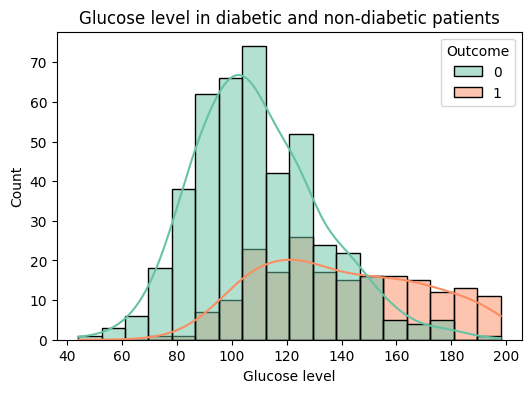

In [19]:
# Bar graph to show Glucose level in diabetic and non-diabetic patients
plt.figure(figsize=(6,4))
sns.histplot(data = df_cleaned, x = 'Glucose', hue = 'Outcome', palette = 'Set2', kde = 'True')
plt.title('Glucose level in diabetic and non-diabetic patients')
plt.xlabel('Glucose level')

C:\Users\ACER\AppData\Local\Temp\ipykernel_11592\3265849027.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Outcome', y = 'Glucose', data = glucose_data, palette = 'Set1')


Text(0.5, 1.0, 'Bar plot representing the mean glucose value for diabetic and non diabetic people')

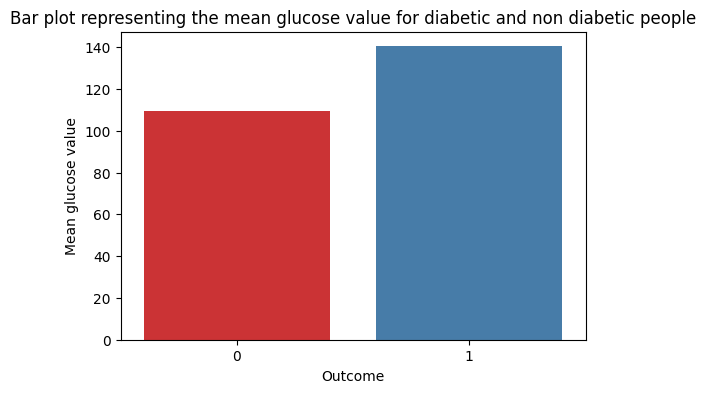

In [20]:
# Finding the mean glucose level for diabetic and non-diabetic patients
glucose_data = df_cleaned.groupby('Outcome').agg({'Glucose': 'mean'}).reset_index() 

# Barplot to visualise the mean glucose value for diabetic and non diabetic people
plt.figure(figsize=(6,4))
sns.barplot(x = 'Outcome', y = 'Glucose', data = glucose_data, palette = 'Set1')
plt.ylabel('Mean glucose value')
plt.title("Bar plot representing the mean glucose value for diabetic and non diabetic people")

Text(0, 0.5, 'Glucose level')

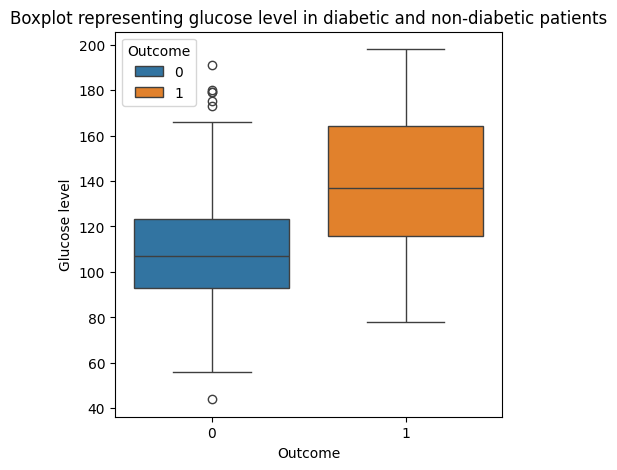

In [21]:
# Boxplot to visualise Glucose level in diabetic and non-diabetic patients
plt.figure(figsize=(5,5))
sns.boxplot(data = df_cleaned , x = 'Outcome', y = 'Glucose', hue = 'Outcome')
plt.title("Boxplot representing glucose level in diabetic and non-diabetic patients")
plt.ylabel('Glucose level')

Text(0.5, 0, 'BMI level (kg/m^2)')

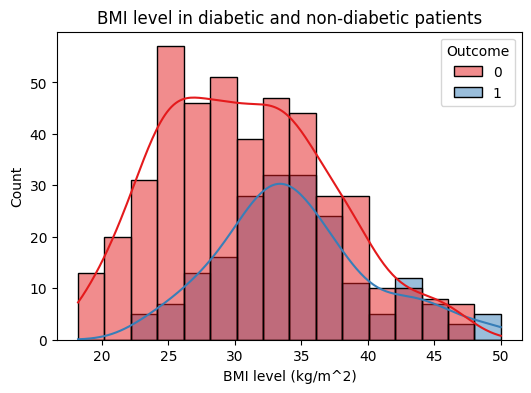

In [22]:
# Bar graph to show BMI level in diabetic and non-diabetic patients
plt.figure(figsize=(6,4))
sns.histplot(data = df_cleaned, x = 'BMI', hue = 'Outcome', palette = 'Set1', kde = 'True')
plt.title('BMI level in diabetic and non-diabetic patients')
plt.xlabel('BMI level (kg/m^2)')

C:\Users\ACER\AppData\Local\Temp\ipykernel_11592\1510552900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Outcome', y = 'BMI', data = bmi_data, palette = 'Set1')


Text(0.5, 1.0, 'Bar plot representing the mean BMI value for diabetic and non diabetic people')

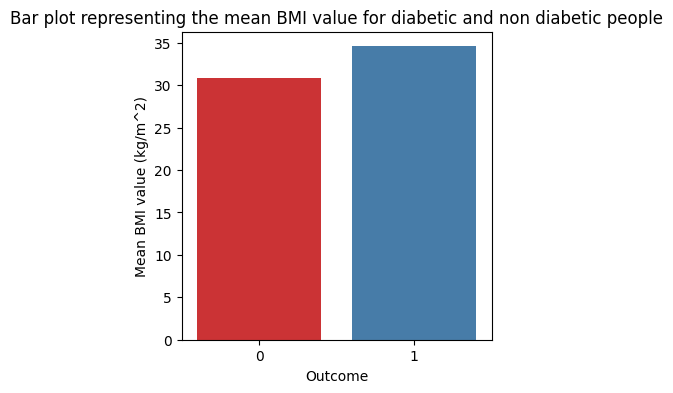

In [23]:
# Finding the mean BMI level for diabetic and non-diabetic patients
bmi_data = df_cleaned.groupby('Outcome').agg({'BMI': 'mean'}).reset_index() 

# Barplot to visualise the mean BMI value for diabetic and non diabetic people
plt.figure(figsize=(4,4))
sns.barplot(x = 'Outcome', y = 'BMI', data = bmi_data, palette = 'Set1')
plt.ylabel('Mean BMI value (kg/m^2)')
plt.title("Bar plot representing the mean BMI value for diabetic and non diabetic people")

Text(0, 0.5, 'BMI level (kg/m^2)')

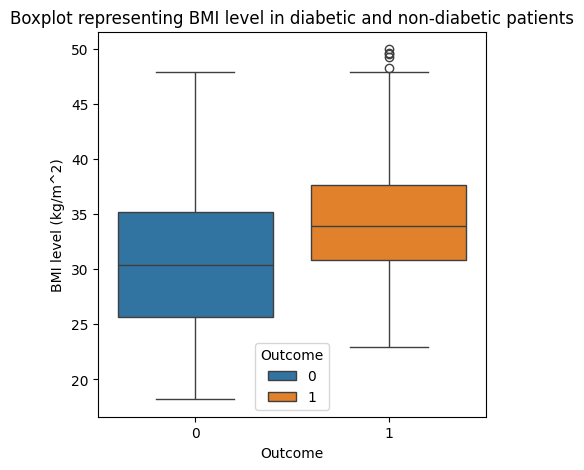

In [24]:
# Boxplot to visualise BMI level in diabetic and non-diabetic patients
plt.figure(figsize=(5,5))
sns.boxplot(data = df_cleaned , x = 'Outcome', y = 'BMI', hue = 'Outcome')
plt.title("Boxplot representing BMI level in diabetic and non-diabetic patients")
plt.ylabel('BMI level (kg/m^2)')

Text(0.5, 0, 'Insulin level (mu U/ml)')

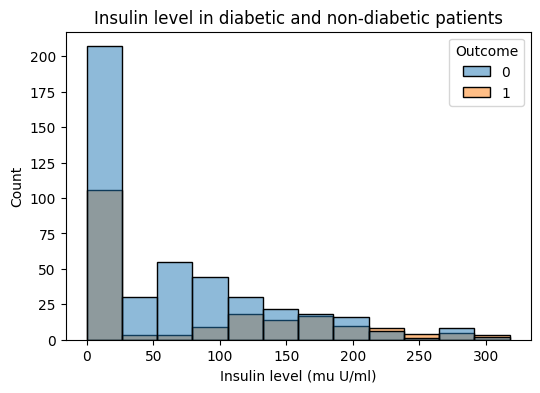

In [25]:
# Bar graph to show Insulin level in diabetic and non-diabetic patients
plt.figure(figsize=(6,4))
sns.histplot(data = df_cleaned, x = 'Insulin', hue = 'Outcome')
plt.title('Insulin level in diabetic and non-diabetic patients')
plt.xlabel('Insulin level (mu U/ml)')

In [26]:
# Finding the mean insulin level for diabetic and non-diabetic patients
insulin_data = df_cleaned.groupby('Outcome').agg({'Insulin': 'mean'}).reset_index() 

C:\Users\ACER\AppData\Local\Temp\ipykernel_11592\134292473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Outcome', y = 'Insulin', data = insulin_data, palette = 'Set1')


Text(0.5, 1.0, 'Bar plot representing the mean insulin value for diabetic and non diabetic people')

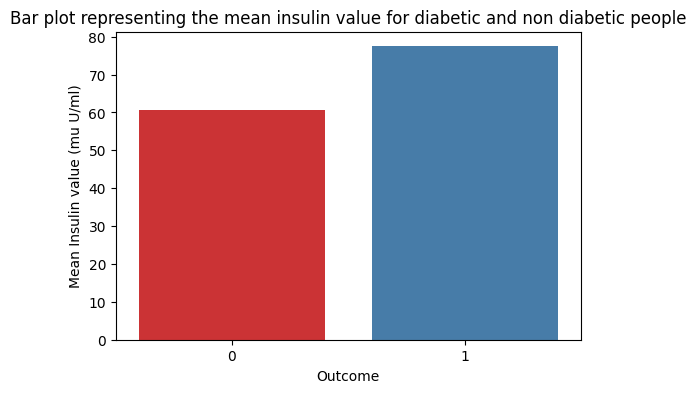

In [27]:
# Barplot to visualise the mean insulin value for diabetic and non diabetic people

plt.figure(figsize=(6,4))
sns.barplot(x = 'Outcome', y = 'Insulin', data = insulin_data, palette = 'Set1')
plt.ylabel('Mean Insulin value (mu U/ml)')
plt.title("Bar plot representing the mean insulin value for diabetic and non diabetic people")

Text(0, 0.5, 'Skin thickness (mm)')

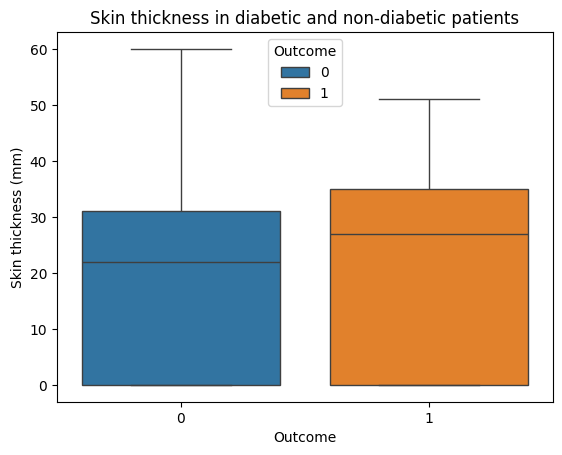

In [28]:
# Boxplot to visualise Skin thickness in diabetic and non-diabetic patients
sns.boxplot(data = df_cleaned , x = 'Outcome', y = 'SkinThickness', hue = 'Outcome')
plt.title("Skin thickness in diabetic and non-diabetic patients")
plt.ylabel('Skin thickness (mm)')

Text(0.5, 1.0, 'DiabetesPedigreeFunction in diabetic and non-diabetic patients')

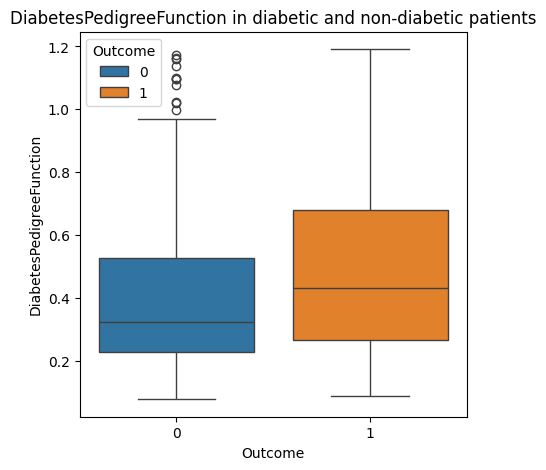

In [29]:
# Boxplot to visualise DiabetesPedigreeFunction in diabetic and non-diabetic patients
plt.figure(figsize=(5,5))
sns.boxplot(data = df_cleaned , x = 'Outcome', y = 'DiabetesPedigreeFunction', hue = 'Outcome')
plt.title("DiabetesPedigreeFunction in diabetic and non-diabetic patients")

[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

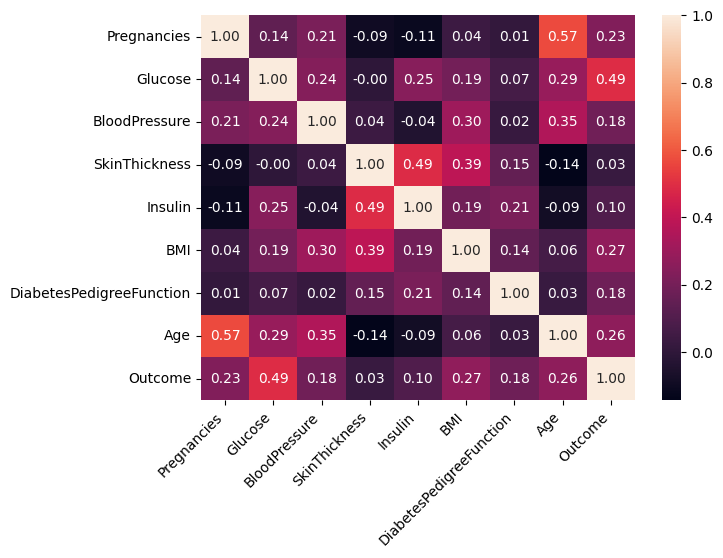

In [30]:
# Correlation heatmap
df_cleaned = df_cleaned.drop(['Age_group'], axis = 1)
plt.figure(figsize=(7,5))
ax = sns.heatmap(df_cleaned.corr(), annot=True, fmt='.2f')
ax.set_xticklabels(df_cleaned.columns, rotation=45, ha='right')

SkinThickness has almost no correlation with Outcome along with Insulin. We can also observe that these 2 variables are intercorrelated slightly therefore we remove SkinThickness and Insulin.

In [31]:
df_cleaned = df_cleaned.drop(['SkinThickness', 'Insulin'], axis = 1)

# Train test split

In [32]:
# Seperate the dataset into features and labels
features = df_cleaned.drop(['Outcome'], axis = 1)
labels = df_cleaned['Outcome']

In [33]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=499)

In [34]:
# View the shape of x_train and x_test
x_train.shape, x_test.shape

((511, 6), (128, 6))

# Class balancing

In [35]:
# Combine x_train and y_train sets to make the train set
train_set = pd.concat([x_train,y_train],axis=1)

In [36]:
train_set

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
11            10      168             74  38.0                     0.537   34   
588            3      176             86  33.3                     1.154   52   
678            3      121             52  36.0                     0.127   25   
256            3      111             56  30.1                     0.557   30   
52             5       88             66  24.4                     0.342   30   
..           ...      ...            ...   ...                       ...  ...   
615            3      106             72  25.8                     0.207   27   
696            3      169             74  29.9                     0.268   31   
431            3       89             74  30.4                     0.551   38   
274           13      106             70  34.2                     0.251   52   
185            7      194             68  35.9                     0.745   41   

     Outcome  
11         1  
588        1  
678        1  
256        0  
52         0  
..       ...  
615        0  
696        1  
431        0  
274        0  
185        1  

[511 rows x 7 columns]

In [37]:
# Recheck the class imbalance
y_train.value_counts()

Outcome
0    354
1    157
Name: count, dtype: int64

In [38]:
# Separate majority and minority classes
data_majority = train_set[train_set.Outcome==0]
data_minority = train_set[train_set.Outcome==1]

In [39]:
# We do upsampling
from sklearn.utils import resample

# Upsampling minority class to get a balanced training set
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=16) 

In [40]:
# Combine the majority class with the upsampled minority class to create a new train set
train_set_new = pd.concat([data_majority,data_minority_upsampled])

In [41]:
# Display new class count in the training set
train_set_new.Outcome.value_counts()

Outcome
0    354
1    354
Name: count, dtype: int64

In [42]:
train_set_new.reset_index(inplace=True, drop = True)

In [43]:
# Create the new x_train and y_train sets
x_train_final = train_set_new.drop(['Outcome'],axis=1)
y_train_final = train_set_new['Outcome']

# Feature selection

In [44]:
# We use the k-best method to select the features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(chi2, k=4)
model.fit_transform(x_train_final, y_train_final)
support = model.get_support()
x_train_final = pd.DataFrame(model.transform(x_train_final), columns = x_train_final.columns.values[support])
x_test_final = pd.DataFrame(model.transform(x_test), columns = x_test.columns.values[support])

In [45]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [46]:
# Find out the columns selected
x_train_final.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')

# Modelling

In [47]:
# Import necessary metrics to evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Define a function to print the relevant scores for each model
def check_accuracy(y_test, pred):
    print("Accuracy : {}%".format(accuracy_score(y_test, pred)*100))
    print("Precision: {}%".format(precision_score(y_test, pred)*100))
    print("Recall   : {}%".format(recall_score(y_test, pred)*100))
    print("F1       : {}%".format(f1_score(y_test, pred)*100))
    print("=======================================================")

## 1. Decision tree

In [48]:
# Import the Decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_dt = DecisionTreeClassifier()

In [50]:
# Train the model
model_dt.fit(x_train_final,y_train_final)

DecisionTreeClassifier()

In [51]:
# Test the model
predictions = model_dt.predict(x_test_final)

# Check the accuracy of the model
check_accuracy(y_test, predictions)

Accuracy : 72.65625%
Precision: 60.0%
Recall   : 55.81395348837209%
F1       : 57.831325301204814%


### Hyperparameter tuning the decision tree model

In [52]:
# Import GridSearchCV and RepeatedStratifiedKFold 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [53]:
# Setup the hyperparameter space
param_grid_dt = {'max_depth': [3,4,5,6,7,8,10],
                'criterion': ['entropy', 'gini'],
                'min_samples_leaf': [1, 2, 3, 5],
                'min_samples_split': [2, 4, 5],
                'max_features': ['sqrt','log2']
                }

In [54]:
# Using gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=33)

grid_search_dt = GridSearchCV(estimator = model_dt,
                          param_grid = param_grid_dt,
                          scoring ='precision',
                          cv = cv,
                          n_jobs = -1,
                          verbose = 10)

In [55]:
# Fitting gridsearch
grid_search_dt.fit(x_train_final, y_train_final)

Fitting 20 folds for each of 336 candidates, totalling 6720 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=33),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 4, 5]},
             scoring='precision', verbose=10)

In [56]:
# Get the best parameters for the decision tree model using gridsearch
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [57]:
# Fit the model using the best parameters
model_dt_tuned = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 10,
                                  max_features = 'log2',
                                  min_samples_leaf = 1,
                                  min_samples_split= 4,
                                  random_state = 88)

In [58]:
# Train the tuned model
model_dt_tuned.fit(x_train_final, y_train_final)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                       random_state=88)

In [59]:
# Test the tuned model
predictions_tuned = model_dt_tuned.predict(x_test_final)

# Check the accuracy of the tuned model
check_accuracy(y_test, predictions_tuned)

Accuracy : 74.21875%
Precision: 62.5%
Recall   : 58.139534883720934%
F1       : 60.24096385542168%


In [60]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_tuned)
pd.DataFrame(cm, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

Predicted Negative  Predicted Positive
Actual Negative                  70                  15
Actual Positive                  18                  25

## 2. Random forest

In [61]:
# Import the Random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [62]:
model_rf = RandomForestClassifier()

In [63]:
# Train the model
model_rf.fit(x_train_final,y_train_final)

# Test the model
predictions = model_rf.predict(x_test_final)

# Check the accuracy of the model
check_accuracy(y_test, predictions)

Accuracy : 74.21875%
Precision: 69.23076923076923%
Recall   : 41.86046511627907%
F1       : 52.17391304347826%


### Hyperparameter tuning the Random forest model

In [64]:
# Setup the hyperparameter space
param_grid_rf = {
    'max_depth': [10, 20, 50],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 250, 500]
}

In [65]:
# Using gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=11)

grid_search_rf = GridSearchCV(estimator = model_rf,
                          param_grid = param_grid_rf,
                          scoring ='precision',
                          cv = cv,
                          n_jobs = -1,
                          verbose = 10)

In [66]:
# Fit gridsearch
grid_search_rf.fit(x_train_final, y_train_final)

Fitting 20 folds for each of 108 candidates, totalling 2160 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=11),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='precision', verbose=10)

In [67]:
# Get the best parameters for the decision tree model using gridsearch
grid_search_rf.best_params_

{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [68]:
# Fit the model using the best parameters
model_rf_tuned = RandomForestClassifier(max_depth = 50,
                                     min_samples_leaf = 2,
                                     min_samples_split = 2,
                                     n_estimators = 100,
                                     random_state=8)

In [69]:
# Train the tuned model
model_rf_tuned.fit(x_train_final, y_train_final)

RandomForestClassifier(max_depth=50, min_samples_leaf=2, random_state=8)

In [70]:
# Test the tuned model
predictions_tuned = model_rf_tuned.predict(x_test_final)

# Check the accuracy of the tuned model
check_accuracy(y_test, predictions_tuned)

Accuracy : 71.09375%
Precision: 58.82352941176471%
Recall   : 46.51162790697674%
F1       : 51.94805194805194%


In [71]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, predictions_tuned)
pd.DataFrame(cm, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

Predicted Negative  Predicted Positive
Actual Negative                  71                  14
Actual Positive                  23                  20

## 3. Logistic regression

In [72]:
# Import necessary models
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [73]:
# Train the logit model
logit_model = sm.Logit(y_train_final, x_train_final).fit()

Optimization terminated successfully.
         Current function value: 0.656731
         Iterations 4


In [74]:
# Print summary
print(logit_model.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Outcome          Pseudo R-squared: 0.053     
Date:               2024-04-02 19:00 AIC:              937.9313  
No. Observations:   708              BIC:              956.1810  
Df Model:           3                Log-Likelihood:   -464.97   
Df Residuals:       704              LL-Null:          -490.75   
Converged:          1.0000           LLR p-value:      3.7075e-11
No. Iterations:     4.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pregnancies    0.0847    0.0285   2.9714  0.0030   0.0288   0.1405
Glucose        0.0161    0.0026   6.1893  0.0000   0.0110   0.0212
BMI           -0.0415    0.0093  -4.4645  0.0000  -0.0597  -0.0233
Age           -0.0244    0.008

In [75]:
# Train the model
logreg = LogisticRegression()
logreg.fit(x_train_final, y_train_final)

LogisticRegression()

In [76]:
# Test the model
predictions = logreg.predict(x_test_final)

# Check the accuracy of the model
check_accuracy(y_test, predictions)

Accuracy : 65.625%
Precision: 49.056603773584904%
Recall   : 60.46511627906976%
F1       : 54.16666666666665%


In [77]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

Predicted Negative  Predicted Positive
Actual Negative                  58                  27
Actual Positive                  17                  26

Hyperparameter tuning is not needed since there are no critical hyperparameters to tune in logistic regression.

## 4. CatBoost

In [78]:
# Import CatBoostClassifier
from catboost import CatBoostClassifier

In [79]:
model_cat = CatBoostClassifier()

In [80]:
# Train the model
model_cat.fit(x_train_final, y_train_final)

Learning rate set to 0.00889
0:	learn: 0.6878580	total: 152ms	remaining: 2m 31s
1:	learn: 0.6832113	total: 156ms	remaining: 1m 17s
2:	learn: 0.6777978	total: 160ms	remaining: 53.2s
3:	learn: 0.6727191	total: 164ms	remaining: 40.9s
4:	learn: 0.6679436	total: 168ms	remaining: 33.4s
5:	learn: 0.6640269	total: 172ms	remaining: 28.5s
6:	learn: 0.6598233	total: 176ms	remaining: 25s
7:	learn: 0.6555087	total: 180ms	remaining: 22.3s
8:	learn: 0.6518547	total: 183ms	remaining: 20.2s
9:	learn: 0.6476926	total: 187ms	remaining: 18.5s
10:	learn: 0.6433826	total: 191ms	remaining: 17.2s
11:	learn: 0.6389307	total: 196ms	remaining: 16.1s
12:	learn: 0.6361833	total: 200ms	remaining: 15.2s
13:	learn: 0.6321590	total: 204ms	remaining: 14.3s
14:	learn: 0.6275174	total: 208ms	remaining: 13.7s
15:	learn: 0.6246662	total: 212ms	remaining: 13.1s
16:	learn: 0.6217659	total: 216ms	remaining: 12.5s
17:	learn: 0.6185822	total: 221ms	remaining: 12s
18:	learn: 0.6149415	total: 223ms	remaining: 11.5s
19:	learn: 0.6

245:	learn: 0.3633753	total: 776ms	remaining: 2.38s
246:	learn: 0.3630892	total: 779ms	remaining: 2.38s
247:	learn: 0.3623307	total: 783ms	remaining: 2.38s
248:	learn: 0.3620856	total: 789ms	remaining: 2.38s
249:	learn: 0.3618294	total: 793ms	remaining: 2.38s
250:	learn: 0.3614979	total: 796ms	remaining: 2.38s
251:	learn: 0.3610427	total: 800ms	remaining: 2.37s
252:	learn: 0.3606761	total: 803ms	remaining: 2.37s
253:	learn: 0.3602303	total: 808ms	remaining: 2.37s
254:	learn: 0.3596499	total: 812ms	remaining: 2.37s
255:	learn: 0.3591844	total: 816ms	remaining: 2.37s
256:	learn: 0.3587653	total: 818ms	remaining: 2.36s
257:	learn: 0.3582699	total: 822ms	remaining: 2.36s
258:	learn: 0.3577261	total: 825ms	remaining: 2.36s
259:	learn: 0.3572659	total: 828ms	remaining: 2.36s
260:	learn: 0.3567864	total: 831ms	remaining: 2.35s
261:	learn: 0.3566468	total: 834ms	remaining: 2.35s
262:	learn: 0.3564242	total: 837ms	remaining: 2.34s
263:	learn: 0.3560660	total: 840ms	remaining: 2.34s
264:	learn: 

406:	learn: 0.3141085	total: 1.35s	remaining: 1.96s
407:	learn: 0.3138582	total: 1.35s	remaining: 1.96s
408:	learn: 0.3136493	total: 1.36s	remaining: 1.96s
409:	learn: 0.3133494	total: 1.36s	remaining: 1.96s
410:	learn: 0.3131759	total: 1.36s	remaining: 1.95s
411:	learn: 0.3128782	total: 1.37s	remaining: 1.95s
412:	learn: 0.3127641	total: 1.37s	remaining: 1.95s
413:	learn: 0.3125589	total: 1.38s	remaining: 1.95s
414:	learn: 0.3123350	total: 1.38s	remaining: 1.95s
415:	learn: 0.3121318	total: 1.39s	remaining: 1.94s
416:	learn: 0.3120378	total: 1.39s	remaining: 1.94s
417:	learn: 0.3118449	total: 1.39s	remaining: 1.94s
418:	learn: 0.3114407	total: 1.4s	remaining: 1.94s
419:	learn: 0.3113949	total: 1.4s	remaining: 1.93s
420:	learn: 0.3110688	total: 1.4s	remaining: 1.93s
421:	learn: 0.3109280	total: 1.41s	remaining: 1.93s
422:	learn: 0.3107120	total: 1.41s	remaining: 1.92s
423:	learn: 0.3104325	total: 1.41s	remaining: 1.92s
424:	learn: 0.3101264	total: 1.42s	remaining: 1.92s
425:	learn: 0.3

607:	learn: 0.2694949	total: 1.92s	remaining: 1.24s
608:	learn: 0.2692858	total: 1.93s	remaining: 1.24s
609:	learn: 0.2690747	total: 1.93s	remaining: 1.24s
610:	learn: 0.2686349	total: 1.94s	remaining: 1.23s
611:	learn: 0.2682335	total: 1.94s	remaining: 1.23s
612:	learn: 0.2681402	total: 1.95s	remaining: 1.23s
613:	learn: 0.2679083	total: 1.95s	remaining: 1.22s
614:	learn: 0.2678033	total: 1.95s	remaining: 1.22s
615:	learn: 0.2673873	total: 1.96s	remaining: 1.22s
616:	learn: 0.2671888	total: 1.96s	remaining: 1.22s
617:	learn: 0.2669660	total: 1.96s	remaining: 1.21s
618:	learn: 0.2667760	total: 1.96s	remaining: 1.21s
619:	learn: 0.2666332	total: 1.97s	remaining: 1.2s
620:	learn: 0.2664555	total: 1.97s	remaining: 1.2s
621:	learn: 0.2662351	total: 1.97s	remaining: 1.2s
622:	learn: 0.2660934	total: 1.97s	remaining: 1.19s
623:	learn: 0.2657384	total: 1.97s	remaining: 1.19s
624:	learn: 0.2656110	total: 1.98s	remaining: 1.19s
625:	learn: 0.2653602	total: 1.98s	remaining: 1.18s
626:	learn: 0.2

776:	learn: 0.2361084	total: 2.31s	remaining: 663ms
777:	learn: 0.2357877	total: 2.31s	remaining: 660ms
778:	learn: 0.2356424	total: 2.32s	remaining: 657ms
779:	learn: 0.2353760	total: 2.32s	remaining: 654ms
780:	learn: 0.2352805	total: 2.32s	remaining: 651ms
781:	learn: 0.2349906	total: 2.33s	remaining: 648ms
782:	learn: 0.2347878	total: 2.33s	remaining: 645ms
783:	learn: 0.2346386	total: 2.33s	remaining: 642ms
784:	learn: 0.2344507	total: 2.33s	remaining: 639ms
785:	learn: 0.2342163	total: 2.34s	remaining: 636ms
786:	learn: 0.2341668	total: 2.34s	remaining: 634ms
787:	learn: 0.2338929	total: 2.37s	remaining: 637ms
788:	learn: 0.2335411	total: 2.37s	remaining: 635ms
789:	learn: 0.2334433	total: 2.38s	remaining: 632ms
790:	learn: 0.2331944	total: 2.38s	remaining: 629ms
791:	learn: 0.2329347	total: 2.38s	remaining: 626ms
792:	learn: 0.2327578	total: 2.39s	remaining: 623ms
793:	learn: 0.2324414	total: 2.39s	remaining: 621ms
794:	learn: 0.2323134	total: 2.4s	remaining: 618ms
795:	learn: 0

949:	learn: 0.2089015	total: 2.89s	remaining: 152ms
950:	learn: 0.2087388	total: 2.9s	remaining: 149ms
951:	learn: 0.2085095	total: 2.9s	remaining: 146ms
952:	learn: 0.2082493	total: 2.9s	remaining: 143ms
953:	learn: 0.2080578	total: 2.91s	remaining: 140ms
954:	learn: 0.2079188	total: 2.91s	remaining: 137ms
955:	learn: 0.2078299	total: 2.91s	remaining: 134ms
956:	learn: 0.2075155	total: 2.92s	remaining: 131ms
957:	learn: 0.2073063	total: 2.92s	remaining: 128ms
958:	learn: 0.2070728	total: 2.92s	remaining: 125ms
959:	learn: 0.2069622	total: 2.92s	remaining: 122ms
960:	learn: 0.2067731	total: 2.93s	remaining: 119ms
961:	learn: 0.2065961	total: 2.93s	remaining: 116ms
962:	learn: 0.2064288	total: 2.93s	remaining: 113ms
963:	learn: 0.2062312	total: 2.94s	remaining: 110ms
964:	learn: 0.2061706	total: 2.94s	remaining: 107ms
965:	learn: 0.2060393	total: 2.94s	remaining: 104ms
966:	learn: 0.2057383	total: 2.94s	remaining: 101ms
967:	learn: 0.2056681	total: 2.95s	remaining: 97.5ms
968:	learn: 0.

In [81]:
# Test the model
predictions = model_cat.predict(x_test_final)

# Check the accuracy of the model
check_accuracy(y_test, predictions)

Accuracy : 73.4375%
Precision: 62.857142857142854%
Recall   : 51.162790697674424%
F1       : 56.41025641025641%


### Hyperparameter tuning the Catboost classifier

In [82]:
# Setup the hyperparameter space
param_grid_cat = {'depth': [2,3,4,5,6],
                  'learning_rate': [0.01,0.03,0.05,0.1,0.25],
                  'iterations': [100,200,300,500]
                 }

In [83]:
# Using gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=78)

grid_search_cat = GridSearchCV(estimator = model_cat,
                          param_grid = param_grid_cat,
                          cv = cv,
                          scoring='precision',
                          n_jobs = -1,
                          verbose = 10)

In [84]:
# Fit gridsearch
grid_search_cat.fit(x_train_final, y_train_final)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
0:	learn: 0.6415895	total: 3.94ms	remaining: 1.96s
1:	learn: 0.6099361	total: 8.43ms	remaining: 2.1s
2:	learn: 0.5720831	total: 11.7ms	remaining: 1.93s
3:	learn: 0.5410913	total: 14.9ms	remaining: 1.85s
4:	learn: 0.5232065	total: 18.1ms	remaining: 1.79s
5:	learn: 0.5042233	total: 21.4ms	remaining: 1.76s
6:	learn: 0.4877910	total: 24.6ms	remaining: 1.73s
7:	learn: 0.4772797	total: 27.9ms	remaining: 1.71s
8:	learn: 0.4634589	total: 31ms	remaining: 1.69s
9:	learn: 0.4520640	total: 33.2ms	remaining: 1.62s
10:	learn: 0.4406439	total: 34.5ms	remaining: 1.53s
11:	learn: 0.4319667	total: 35.9ms	remaining: 1.46s
12:	learn: 0.4233647	total: 37.3ms	remaining: 1.4s
13:	learn: 0.4158891	total: 38.7ms	remaining: 1.34s
14:	learn: 0.4107003	total: 40ms	remaining: 1.29s
15:	learn: 0.4045399	total: 41.4ms	remaining: 1.25s
16:	learn: 0.4007418	total: 42.8ms	remaining: 1.21s
17:	learn: 0.3946649	total: 44.1ms	remaining: 1.18s
18:	learn: 0.39

178:	learn: 0.1323135	total: 378ms	remaining: 678ms
179:	learn: 0.1315916	total: 381ms	remaining: 678ms
180:	learn: 0.1309134	total: 385ms	remaining: 679ms
181:	learn: 0.1301560	total: 389ms	remaining: 680ms
182:	learn: 0.1295379	total: 393ms	remaining: 681ms
183:	learn: 0.1293034	total: 397ms	remaining: 682ms
184:	learn: 0.1284521	total: 401ms	remaining: 682ms
185:	learn: 0.1276088	total: 403ms	remaining: 681ms
186:	learn: 0.1273592	total: 409ms	remaining: 684ms
187:	learn: 0.1264948	total: 414ms	remaining: 687ms
188:	learn: 0.1260334	total: 419ms	remaining: 689ms
189:	learn: 0.1253600	total: 421ms	remaining: 688ms
190:	learn: 0.1252208	total: 426ms	remaining: 689ms
191:	learn: 0.1247528	total: 430ms	remaining: 689ms
192:	learn: 0.1241355	total: 432ms	remaining: 688ms
193:	learn: 0.1235482	total: 435ms	remaining: 686ms
194:	learn: 0.1232813	total: 438ms	remaining: 685ms
195:	learn: 0.1230090	total: 441ms	remaining: 684ms
196:	learn: 0.1223649	total: 444ms	remaining: 683ms
197:	learn: 

363:	learn: 0.0572220	total: 765ms	remaining: 286ms
364:	learn: 0.0571668	total: 769ms	remaining: 285ms
365:	learn: 0.0570488	total: 774ms	remaining: 283ms
366:	learn: 0.0568329	total: 777ms	remaining: 281ms
367:	learn: 0.0564534	total: 780ms	remaining: 280ms
368:	learn: 0.0562047	total: 783ms	remaining: 278ms
369:	learn: 0.0560301	total: 787ms	remaining: 277ms
370:	learn: 0.0557526	total: 791ms	remaining: 275ms
371:	learn: 0.0557003	total: 794ms	remaining: 273ms
372:	learn: 0.0556474	total: 796ms	remaining: 271ms
373:	learn: 0.0555834	total: 798ms	remaining: 269ms
374:	learn: 0.0554586	total: 799ms	remaining: 266ms
375:	learn: 0.0553686	total: 801ms	remaining: 264ms
376:	learn: 0.0552104	total: 803ms	remaining: 262ms
377:	learn: 0.0547960	total: 805ms	remaining: 260ms
378:	learn: 0.0544320	total: 806ms	remaining: 257ms
379:	learn: 0.0541173	total: 808ms	remaining: 255ms
380:	learn: 0.0540679	total: 810ms	remaining: 253ms
381:	learn: 0.0539735	total: 812ms	remaining: 251ms
382:	learn: 

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=78),
             estimator=<catboost.core.CatBoostClassifier object at 0x0000026DF1A771F0>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 4, 5, 6],
                         'iterations': [100, 200, 300, 500],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.25]},
             scoring='precision', verbose=10)

In [85]:
# Get the best parameters for the decision tree model using gridsearch
grid_search_cat.best_params_

{'depth': 5, 'iterations': 500, 'learning_rate': 0.1}

In [86]:
# Fit the model using the best parameters
model_cat_tuned = CatBoostClassifier(depth = 5,
                                     learning_rate = 0.1,
                                     iterations = 500)

In [87]:
# Train the tuned model
model_cat_tuned.fit(x_train_final, y_train_final)

0:	learn: 0.6415895	total: 5.03ms	remaining: 2.51s
1:	learn: 0.6099361	total: 9.5ms	remaining: 2.36s
2:	learn: 0.5720831	total: 13.2ms	remaining: 2.19s
3:	learn: 0.5410913	total: 16.3ms	remaining: 2.02s
4:	learn: 0.5232065	total: 19.2ms	remaining: 1.9s
5:	learn: 0.5042233	total: 22.1ms	remaining: 1.82s
6:	learn: 0.4877910	total: 23.8ms	remaining: 1.67s
7:	learn: 0.4772797	total: 25.3ms	remaining: 1.56s
8:	learn: 0.4634589	total: 26.8ms	remaining: 1.46s
9:	learn: 0.4520640	total: 28.9ms	remaining: 1.41s
10:	learn: 0.4406439	total: 31.4ms	remaining: 1.4s
11:	learn: 0.4319667	total: 33.1ms	remaining: 1.34s
12:	learn: 0.4233647	total: 34.7ms	remaining: 1.3s
13:	learn: 0.4158891	total: 36.4ms	remaining: 1.26s
14:	learn: 0.4107003	total: 38ms	remaining: 1.23s
15:	learn: 0.4045399	total: 39.8ms	remaining: 1.2s
16:	learn: 0.4007418	total: 41.8ms	remaining: 1.19s
17:	learn: 0.3946649	total: 43.7ms	remaining: 1.17s
18:	learn: 0.3918768	total: 46.1ms	remaining: 1.17s
19:	learn: 0.3890705	total: 4

192:	learn: 0.1241355	total: 381ms	remaining: 607ms
193:	learn: 0.1235482	total: 385ms	remaining: 607ms
194:	learn: 0.1232813	total: 388ms	remaining: 607ms
195:	learn: 0.1230090	total: 392ms	remaining: 608ms
196:	learn: 0.1223649	total: 395ms	remaining: 608ms
197:	learn: 0.1215998	total: 399ms	remaining: 609ms
198:	learn: 0.1201336	total: 403ms	remaining: 610ms
199:	learn: 0.1197184	total: 407ms	remaining: 610ms
200:	learn: 0.1196425	total: 410ms	remaining: 610ms
201:	learn: 0.1190831	total: 420ms	remaining: 620ms
202:	learn: 0.1189220	total: 423ms	remaining: 619ms
203:	learn: 0.1177582	total: 427ms	remaining: 620ms
204:	learn: 0.1168172	total: 432ms	remaining: 622ms
205:	learn: 0.1161309	total: 437ms	remaining: 624ms
206:	learn: 0.1159855	total: 441ms	remaining: 624ms
207:	learn: 0.1147758	total: 443ms	remaining: 621ms
208:	learn: 0.1137727	total: 444ms	remaining: 618ms
209:	learn: 0.1129940	total: 446ms	remaining: 616ms
210:	learn: 0.1119850	total: 447ms	remaining: 613ms
211:	learn: 

382:	learn: 0.0537235	total: 766ms	remaining: 234ms
383:	learn: 0.0532859	total: 769ms	remaining: 232ms
384:	learn: 0.0531516	total: 773ms	remaining: 231ms
385:	learn: 0.0529053	total: 777ms	remaining: 230ms
386:	learn: 0.0528817	total: 781ms	remaining: 228ms
387:	learn: 0.0527288	total: 784ms	remaining: 226ms
388:	learn: 0.0527070	total: 787ms	remaining: 225ms
389:	learn: 0.0526245	total: 790ms	remaining: 223ms
390:	learn: 0.0525821	total: 794ms	remaining: 221ms
391:	learn: 0.0524450	total: 797ms	remaining: 220ms
392:	learn: 0.0522397	total: 799ms	remaining: 218ms
393:	learn: 0.0521737	total: 801ms	remaining: 215ms
394:	learn: 0.0521259	total: 803ms	remaining: 213ms
395:	learn: 0.0518633	total: 806ms	remaining: 212ms
396:	learn: 0.0517460	total: 807ms	remaining: 209ms
397:	learn: 0.0515866	total: 809ms	remaining: 207ms
398:	learn: 0.0513028	total: 811ms	remaining: 205ms
399:	learn: 0.0511622	total: 813ms	remaining: 203ms
400:	learn: 0.0509202	total: 814ms	remaining: 201ms
401:	learn: 

In [88]:
# Test the tuned model
predictions_tuned = model_cat_tuned.predict(x_test_final)

# Check the accuracy of the tuned model
check_accuracy(y_test, predictions_tuned)

Accuracy : 74.21875%
Precision: 66.66666666666666%
Recall   : 46.51162790697674%
F1       : 54.794520547945204%


In [89]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, predictions_tuned)
pd.DataFrame(cm, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

Predicted Negative  Predicted Positive
Actual Negative                  75                  10
Actual Positive                  23                  20

## 5. Gradient boosting classifier

In [90]:
# Import Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
model_grb = GradientBoostingClassifier()

In [92]:
# Train the model
model_grb.fit(x_train_final, y_train_final)

GradientBoostingClassifier()

In [93]:
# Test the model
predictions = model_grb.predict(x_test_final)

# Check the accuracy of the model
check_accuracy(y_test, predictions)

Accuracy : 71.875%
Precision: 58.139534883720934%
Recall   : 58.139534883720934%
F1       : 58.139534883720934%


### Hyperparameter tuning the gradient boosting classifier

In [94]:
# Setup the hyperparameter space
param_grid_grb = {'loss': ['log_loss', 'exponential'],
                  'n_estimators': [50, 100, 200, 300],
                  'learning_rate': [0.03,0.05,0.1],
                  'max_depth': [1,3,5,7],
                  'min_samples_split': [2,3,5]
                 }

In [95]:
# Using gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=50)

grid_search_grb = GridSearchCV(estimator = model_grb,
                          param_grid = param_grid_grb,
                          scoring='precision',
                          cv = cv,
                          n_jobs = -1,
                          verbose = 10)

In [96]:
# Fit gridsearch
grid_search_grb.fit(x_train_final, y_train_final)

Fitting 20 folds for each of 288 candidates, totalling 5760 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=50),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [1, 3, 5, 7],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='precision', verbose=10)

In [97]:
# Get the best parameters for the decision tree model using gridsearch
grid_search_grb.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 300}

In [98]:
# Fit the model using the best parameters
model_grb_tuned = GradientBoostingClassifier(loss = 'exponential',
                                             learning_rate = 0.1,
                                             max_depth = 7,
                                             n_estimators = 200,
                                             min_samples_split=2)

In [99]:
# Train the tuned model
model_grb_tuned.fit(x_train_final, y_train_final)

GradientBoostingClassifier(loss='exponential', max_depth=7, n_estimators=200)

In [100]:
# Test the tuned model
predictions_tuned = model_grb_tuned.predict(x_test_final)

# Check the accuracy of the tuned model
check_accuracy(y_test, predictions_tuned)

Accuracy : 71.09375%
Precision: 60.71428571428571%
Recall   : 39.53488372093023%
F1       : 47.88732394366197%


In [101]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, predictions_tuned)
pd.DataFrame(cm, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

Predicted Negative  Predicted Positive
Actual Negative                  74                  11
Actual Positive                  26                  17

# Plot ROC curves

<Figure size 640x480 with 0 Axes>

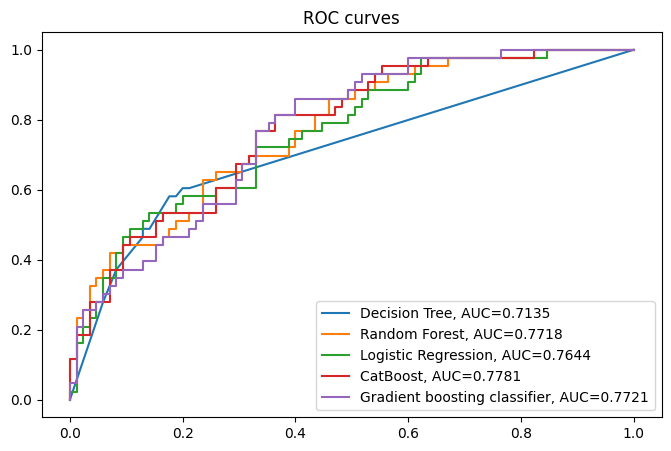

In [102]:
# Import roc curve and roc auc score
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(0).clf()
plt.figure(figsize=(8,5))
plt.title('ROC curves')

# Decision Tree
y_pred = model_dt_tuned.predict_proba(x_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

# Random Forest
y_pred = model_rf_tuned.predict_proba(x_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# Logistic regression
y_pred = logreg.predict_proba(x_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# CatBoost
y_pred = model_cat_tuned.predict_proba(x_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="CatBoost, AUC="+str(auc))

# Gradient boosting classifier
y_pred = model_grb_tuned.predict_proba(x_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient boosting classifier, AUC="+str(auc))

plt.legend() # Plot legend
